In [20]:
###### block 1 #########
import random
import nibabel as nib
from glob import glob
import numpy as np
from matplotlib.pylab import plt
from PIL import Image
import math as m
import os
import copy
from torch import optim
from torch.utils.data import DataLoader
import sys
import torch.nn as nn
import torch
import cv2
import subprocess
import time
import shutil
from scipy import stats

In [24]:
### block 6 ####
########### Weighted GMM ########################
# files: ground truth folder
# pd is the prediction results 
####  g_result: the result of the detection rate in every STEM image ###
### gf_result: the # of false positives in every STEM image #####

files=[f'./point_result/{i}.tif' for i in range(120)]
dis=0
count=0
s=0
g_result=[]
w=[]

gf_result=[]
totall=0
# os.mkdir('./remake')
for f in files:
#     flag=int(f.split('T')[-1].split('.')[0])
#     print(flag)
    
#     os.rename(f,f'./point_result/{flag}.tif')
 
    count+=1
    gt=plt.imread(f)

    pd=plt.imread('./GMM_result/'+f.split('/')[-1])
    gt_c=[]
    pd_c=[]
   

    for i in range(len(gt)):
        for j in range(len(gt[0])):
            if gt[i][j]==255:
                gt_c.append([i,j])
            if pd[i][j]==255:
                pd_c.append([i,j])
#     print(len(pd_c))
#     print(len(gt_c))
    a=0
    a=[]
    sltd=[0 for _ in range(len(gt_c))]
    fp=0
    for i in range(len(pd_c)):
        d=[]
        for j in range(len(gt_c)):
            ds=np.linalg.norm(np.array(gt_c[j])-np.array(pd_c[i]))
            d.append(ds)
#         print(d)
        m_ds=min(d)
        index=d.index(m_ds)
#         print(m_ds,sltd)
        if m_ds<4 and sltd[index]==0:
            a.append(m_ds)
            sltd[index]+=1
        elif m_ds>4:
            fp+=1
            a.append(m_ds)
        elif ds<4 and sltd[index]!=0:
            a.append(10000)
            sltd[index]+=1
            fp+=1
   
    dd=0
    for i in a:
        if i<4:
            dd+=1
    if dd>len(gt_c):
        g_result.append(1.0)
    else:
        g_result.append(dd/len(gt_c))

    
    gf_result.append(len(pd_c)-dd)
    if g_result[-1]!=1:

     
        w.append(f)
    totall+=len(gt_c)
#     if max(a)>2:


In [22]:
len(gf_result)

120

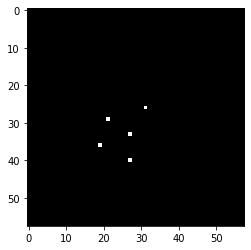

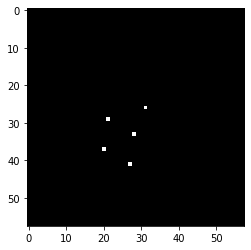

[0.0, 0.0, 1.0, 1.4142135623730951, 1.0]
1.0



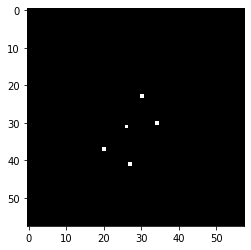

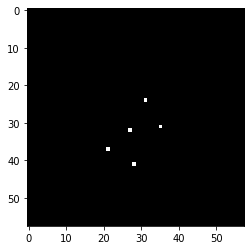

[1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.0, 1.0]
1.0



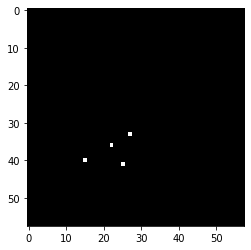

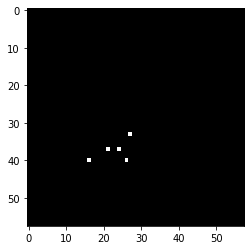

[0.0, 1.4142135623730951, 1.0, 1.4142135623730951]
0.8



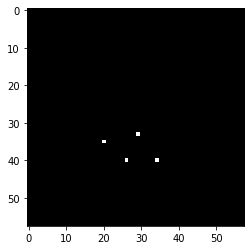

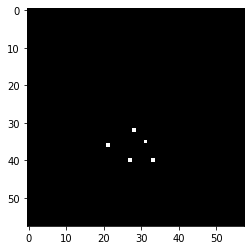

[1.4142135623730951, 1.4142135623730951, 1.0, 1.0]
0.8



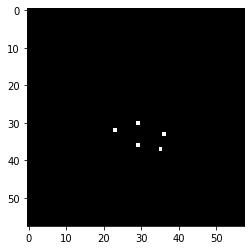

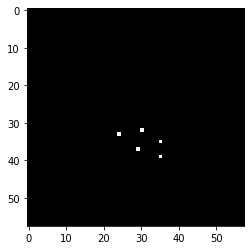

[2.23606797749979, 1.4142135623730951, 2.23606797749979, 1.0, 10000]
0.8



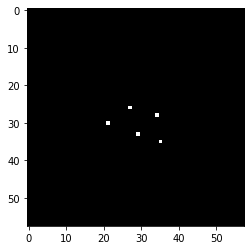

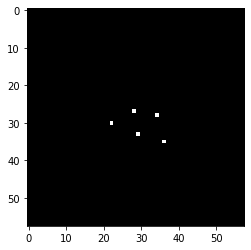

[1.4142135623730951, 0.0, 1.0, 0.0, 1.0]
1.0



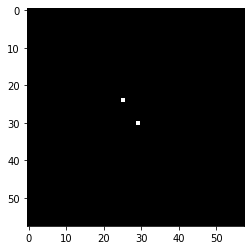

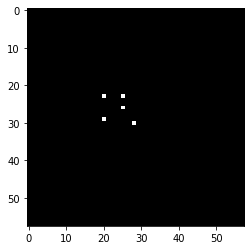

[1.0, 1.0]
0.4



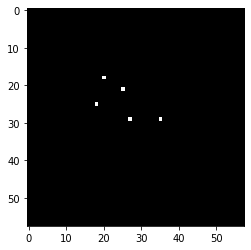

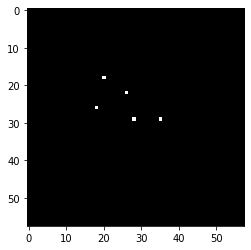

[0.0, 1.4142135623730951, 1.0, 1.0, 0.0]
1.0



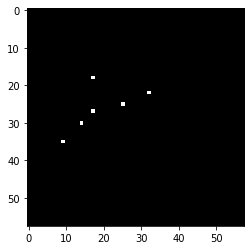

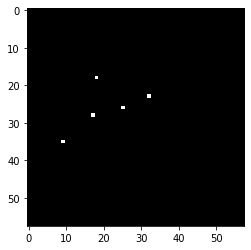

[1.0, 1.0, 1.0, 1.0, 0.0]
1.0



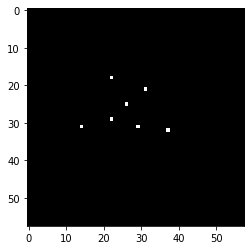

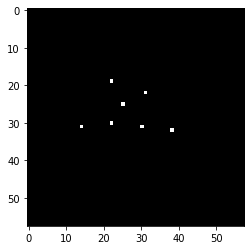

[1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0]
1.0



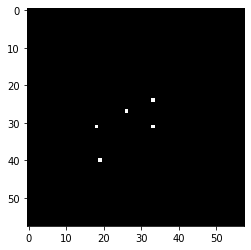

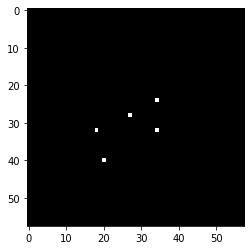

[1.0, 1.4142135623730951, 1.0, 1.4142135623730951, 1.0]
1.0



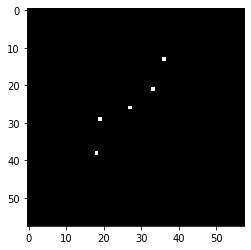

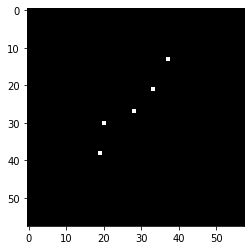

[1.0, 0.0, 1.4142135623730951, 1.4142135623730951, 1.0]
1.0



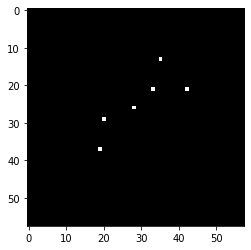

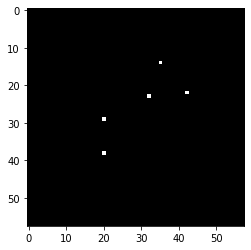

[1.0, 2.23606797749979, 1.0, 5.0, 0.0, 1.4142135623730951]
1.0



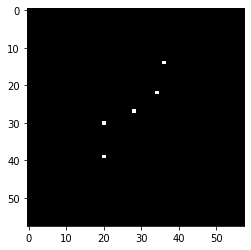

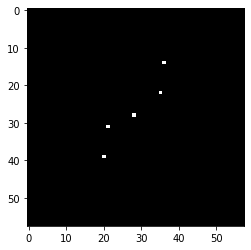

[0.0, 1.0, 1.0, 1.4142135623730951, 0.0]
1.0



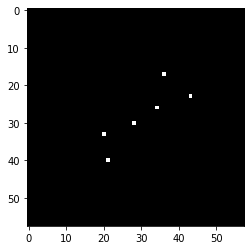

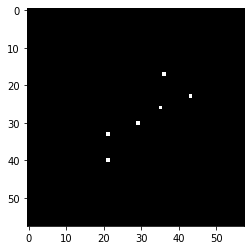

[0.0, 0.0, 1.0, 1.0, 1.0, 0.0]
1.0



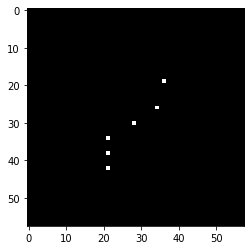

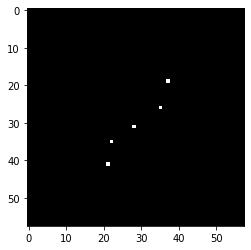

[1.0, 1.0, 1.0, 1.4142135623730951, 3.0, 10000]
1.0



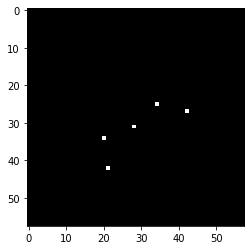

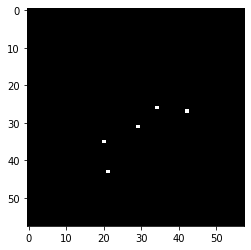

[1.0, 0.0, 1.0, 1.0, 1.0]
1.0



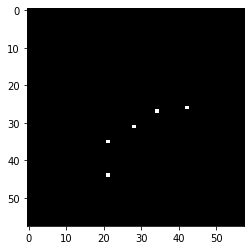

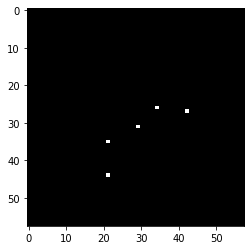

[1.0, 1.0, 1.0, 0.0, 0.0]
1.0



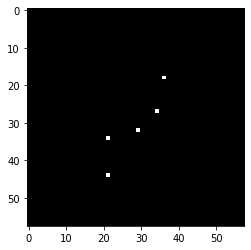

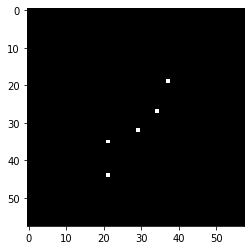

[1.4142135623730951, 0.0, 0.0, 1.0, 0.0]
1.0



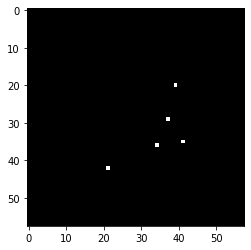

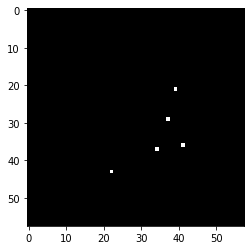

[1.0, 0.0, 1.0, 1.0, 1.4142135623730951]
1.0



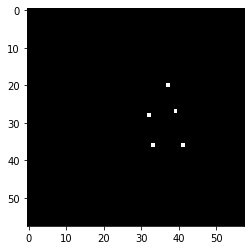

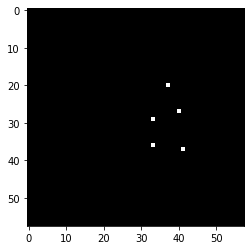

[0.0, 1.0, 1.4142135623730951, 0.0, 1.0]
1.0



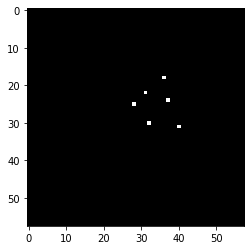

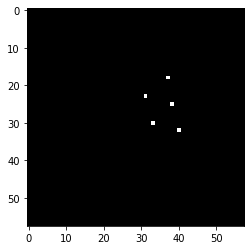

[1.0, 1.0, 1.4142135623730951, 1.0, 1.0]
1.0



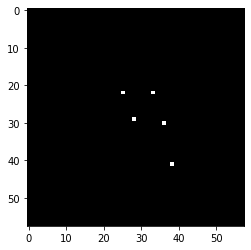

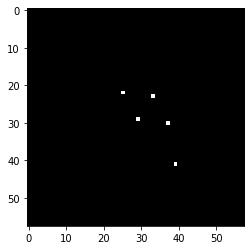

[0.0, 1.0, 1.0, 1.0, 1.0]
1.0



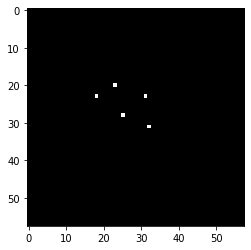

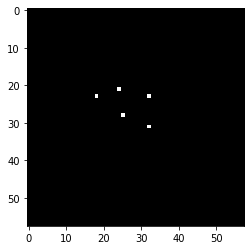

[1.4142135623730951, 0.0, 1.0, 0.0, 0.0]
1.0



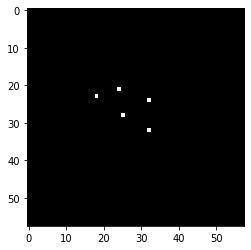

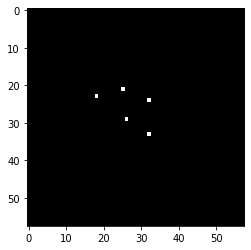

[1.0, 0.0, 0.0, 1.4142135623730951, 1.0]
1.0



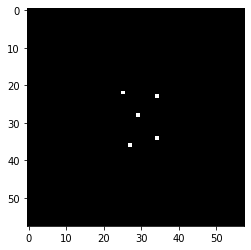

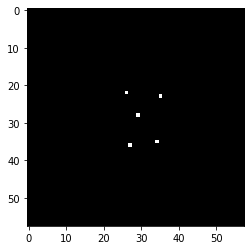

[1.0, 1.0, 0.0, 1.0, 0.0]
1.0



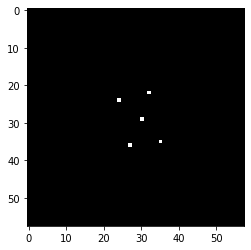

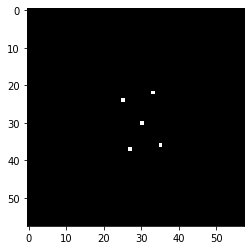

[1.0, 1.0, 1.0, 1.0, 1.0]
1.0



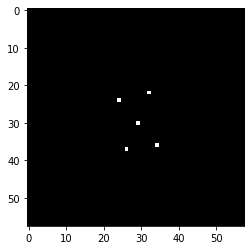

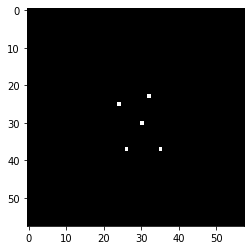

[1.0, 1.0, 1.0, 1.4142135623730951, 0.0]
1.0



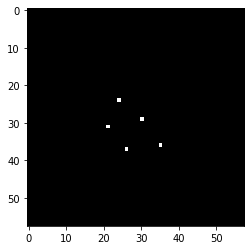

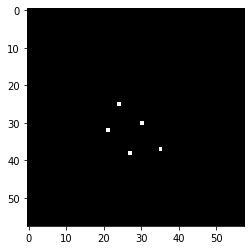

[1.0, 1.0, 1.0, 1.0, 1.4142135623730951]
1.0



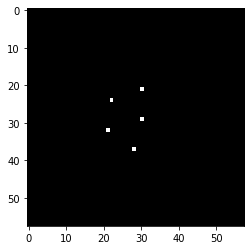

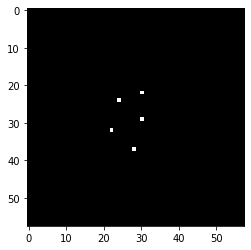

[1.0, 2.0, 0.0, 1.0, 0.0]
1.0



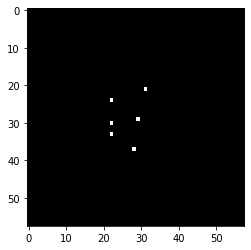

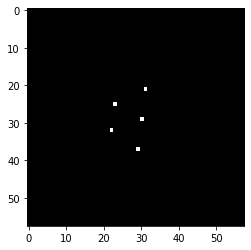

[0.0, 1.4142135623730951, 1.0, 2.0, 1.0]
1.0



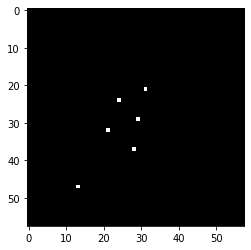

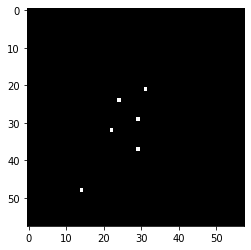

[0.0, 0.0, 0.0, 1.0, 1.0, 1.4142135623730951]
1.0



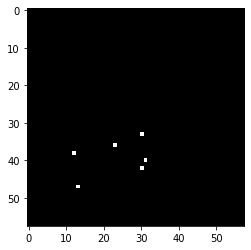

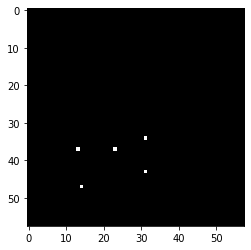

[1.4142135623730951, 1.0, 1.4142135623730951, 3.0, 1.0]
1.0



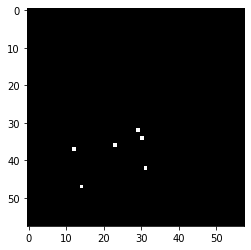

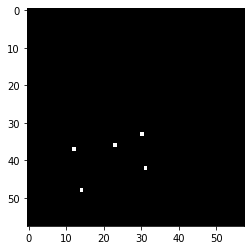

[1.4142135623730951, 0.0, 0.0, 0.0, 1.0]
1.0



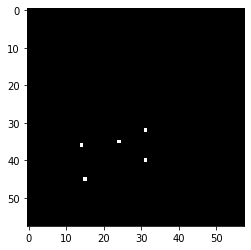

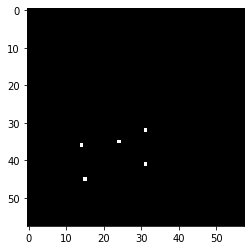

[0.0, 0.0, 0.0, 1.0, 0.0]
1.0



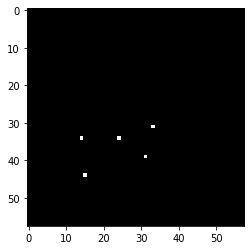

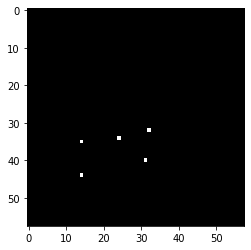

[1.4142135623730951, 1.0, 0.0, 1.0, 1.0]
1.0



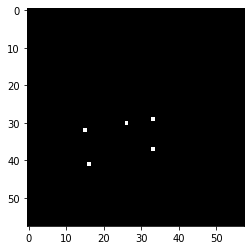

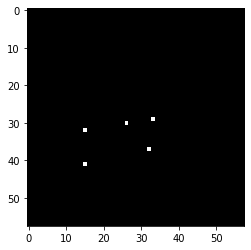

[0.0, 0.0, 0.0, 1.0, 1.0]
1.0



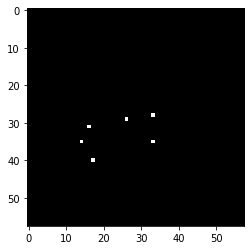

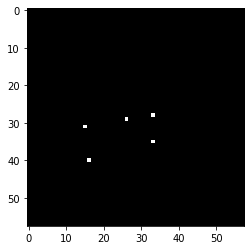

[0.0, 0.0, 1.0, 4.123105625617661, 0.0, 1.0]
1.0



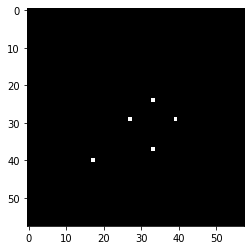

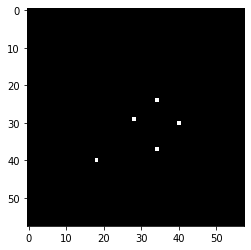

[1.0, 1.0, 1.4142135623730951, 1.0, 1.0]
1.0



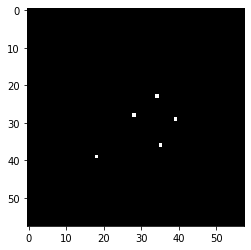

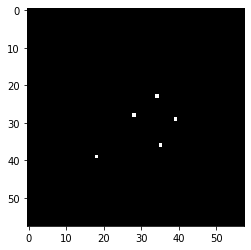

[0.0, 0.0, 0.0, 0.0, 0.0]
1.0



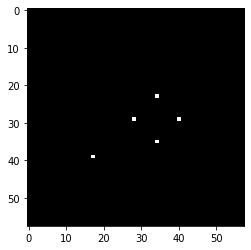

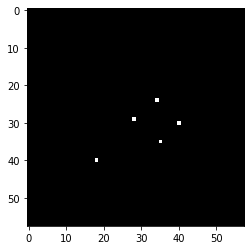

[1.0, 0.0, 1.0, 1.0, 1.4142135623730951]
1.0



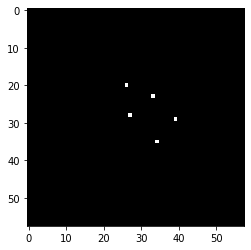

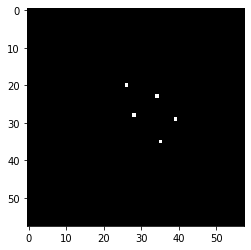

[0.0, 1.0, 1.0, 0.0, 1.0]
1.0



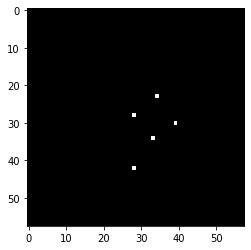

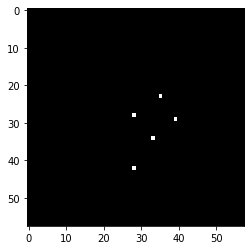

[1.0, 0.0, 1.0, 0.0, 0.0]
1.0



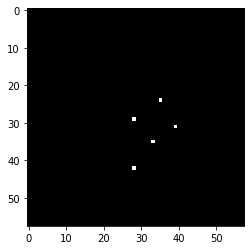

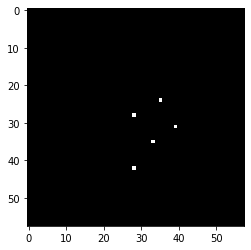

[0.0, 1.0, 0.0, 0.0, 0.0]
1.0



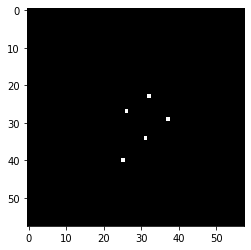

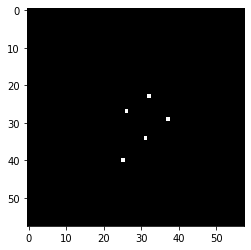

[0.0, 0.0, 0.0, 0.0, 0.0]
1.0



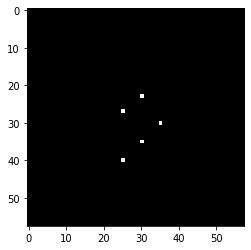

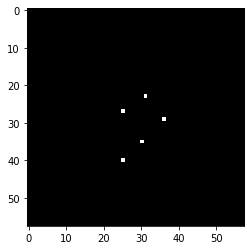

[1.0, 0.0, 1.4142135623730951, 0.0, 0.0]
1.0



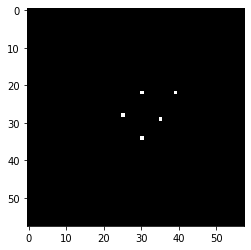

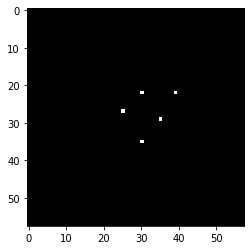

[0.0, 0.0, 1.0, 0.0, 1.0]
1.0



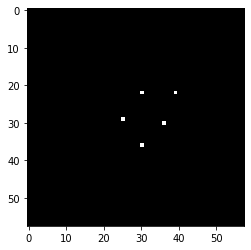

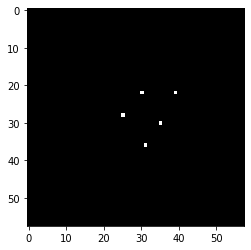

[0.0, 0.0, 1.0, 1.0, 1.0]
1.0



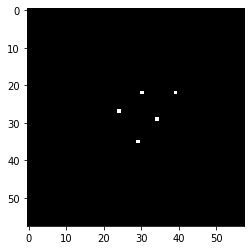

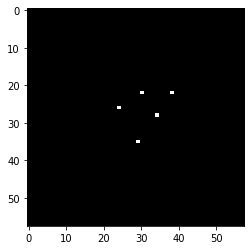

[0.0, 1.0, 1.0, 1.0, 0.0]
1.0



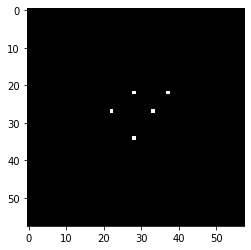

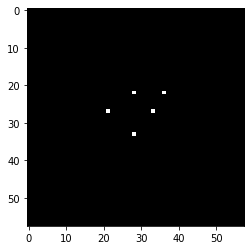

[0.0, 1.0, 1.0, 0.0, 1.0]
1.0



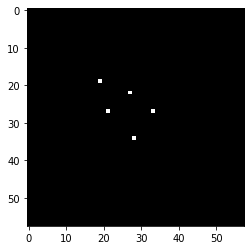

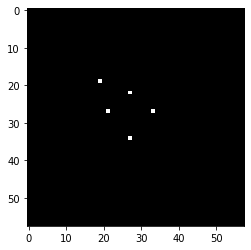

[0.0, 0.0, 0.0, 0.0, 1.0]
1.0



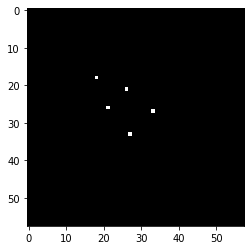

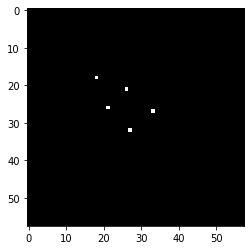

[0.0, 0.0, 0.0, 0.0, 1.0]
1.0



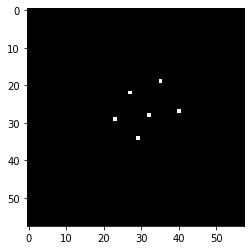

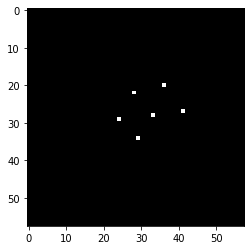

[1.4142135623730951, 1.0, 1.0, 1.0, 1.0, 0.0]
1.0



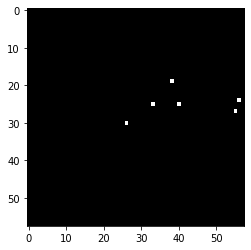

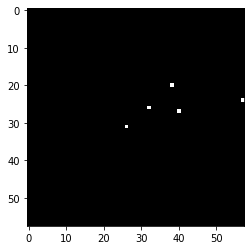

[1.0, 1.0, 1.4142135623730951, 2.0, 1.0]
1.0



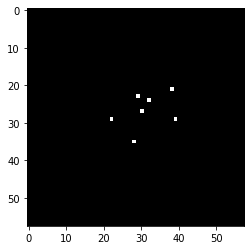

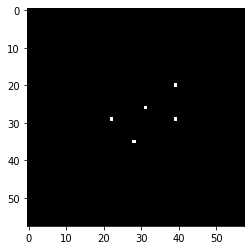

[1.4142135623730951, 3.605551275463989, 0.0, 0.0, 0.0]
1.0



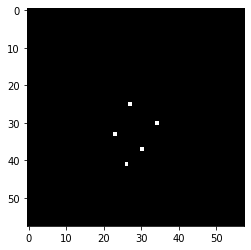

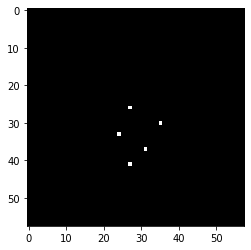

[1.0, 1.0, 1.0, 1.0, 1.0]
1.0



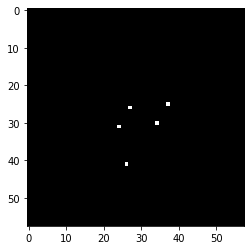

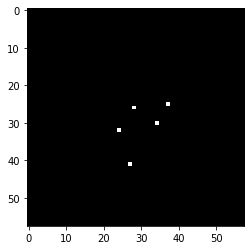

[0.0, 1.0, 0.0, 1.0, 1.0]
1.0



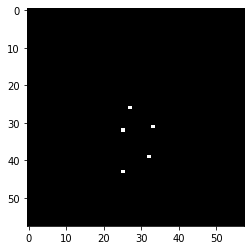

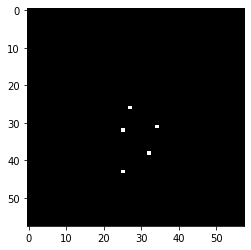

[0.0, 1.0, 0.0, 1.0, 0.0]
1.0



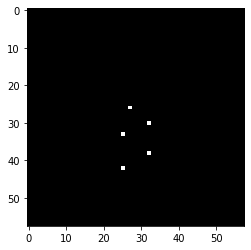

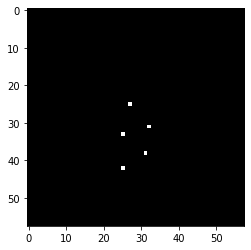

[1.0, 1.0, 0.0, 1.0, 0.0]
1.0



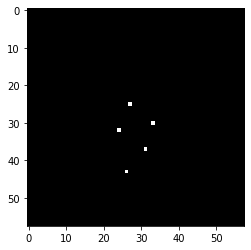

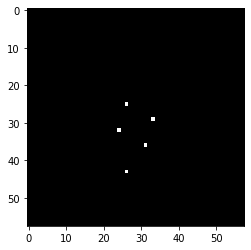

[1.0, 1.0, 0.0, 1.0, 0.0]
1.0



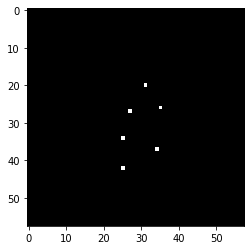

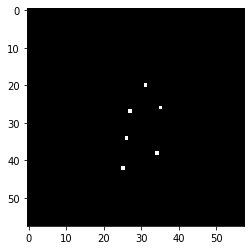

[0.0, 0.0, 0.0, 1.0, 1.0, 0.0]
1.0



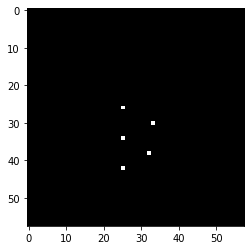

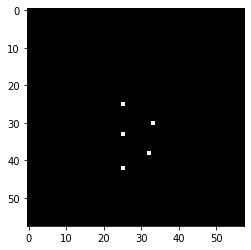

[1.0, 0.0, 1.0, 0.0, 0.0]
1.0



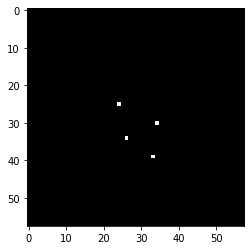

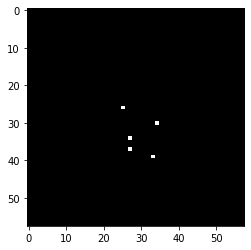

[1.4142135623730951, 0.0, 1.0, 0.0]
0.8



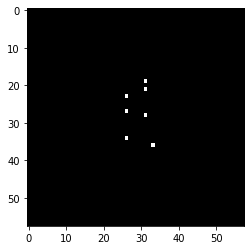

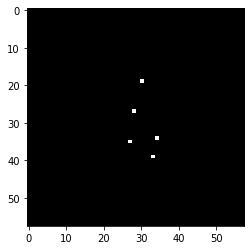

[1.0, 4.47213595499958, 2.0, 1.4142135623730951, 2.23606797749979]
0.8



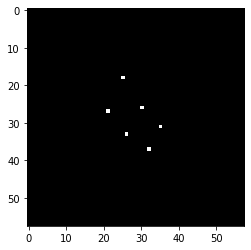

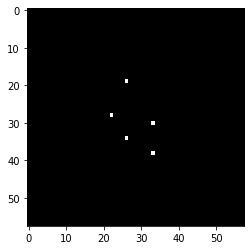

[1.4142135623730951, 5.0, 1.4142135623730951, 2.23606797749979, 1.0, 1.4142135623730951]
1.0



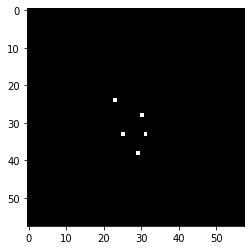

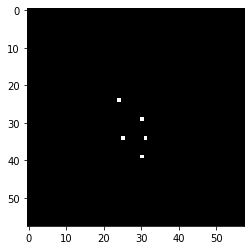

[1.0, 1.0, 1.0, 1.0, 1.4142135623730951]
1.0



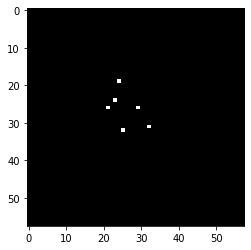

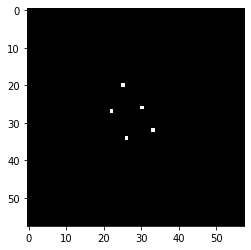

[1.4142135623730951, 3.1622776601683795, 1.0, 1.4142135623730951, 2.23606797749979]
1.0



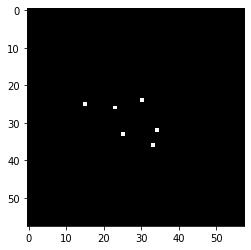

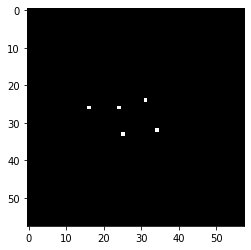

[1.0, 1.4142135623730951, 1.0, 0.0, 0.0, 4.123105625617661]
1.0



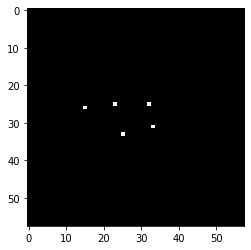

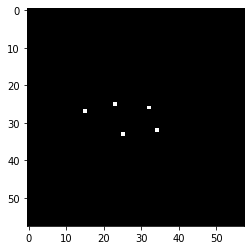

[0.0, 1.0, 1.0, 1.4142135623730951, 0.0]
1.0



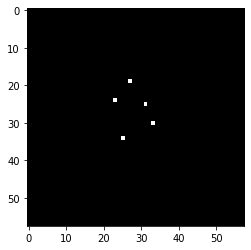

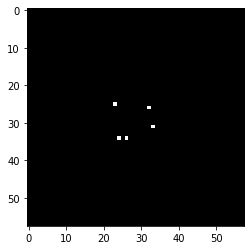

[7.211102550927978, 1.0, 1.4142135623730951, 1.0, 1.0]
0.8



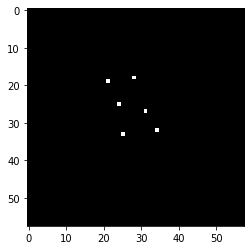

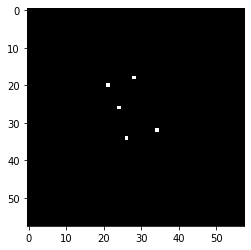

[0.0, 1.0, 1.0, 5.830951894845301, 0.0, 1.4142135623730951]
1.0



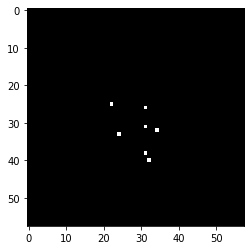

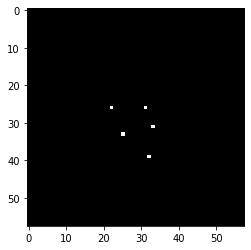

[1.0, 0.0, 2.0, 1.0, 1.4142135623730951, 10000]
1.0



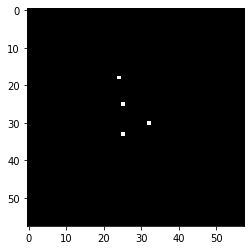

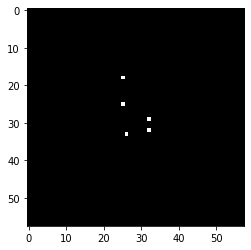

[1.0, 0.0, 1.0, 1.0]
0.8



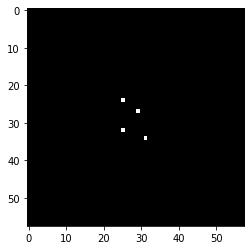

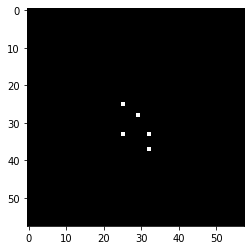

[1.0, 1.0, 1.0, 1.4142135623730951]
0.8



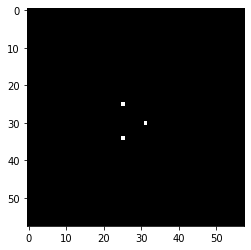

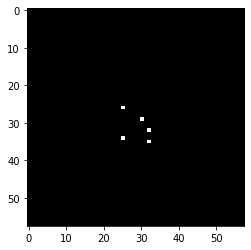

[1.0, 1.4142135623730951, 0.0]
0.6



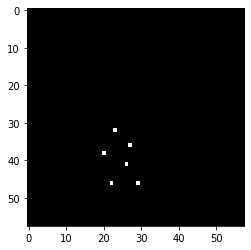

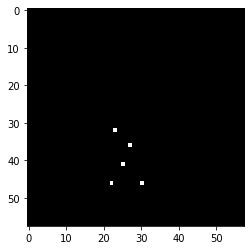

[0.0, 0.0, 5.830951894845301, 1.0, 0.0, 1.0]
1.0



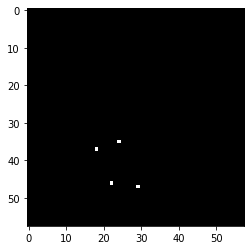

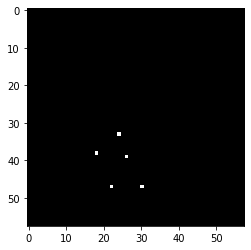

[2.0, 1.0, 1.0, 1.0]
0.8



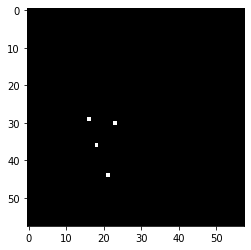

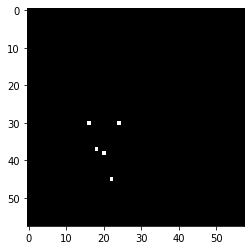

[1.0, 1.0, 1.0, 1.4142135623730951]
0.8



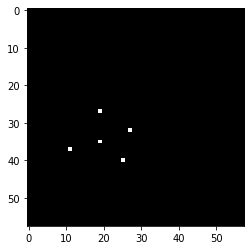

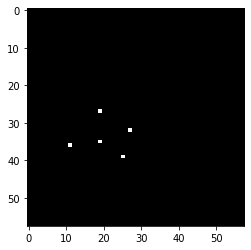

[0.0, 0.0, 0.0, 1.0, 1.0]
1.0



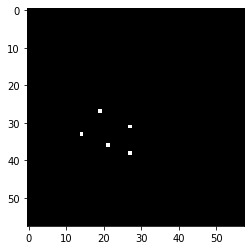

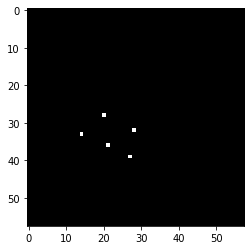

[1.4142135623730951, 1.4142135623730951, 0.0, 0.0, 1.0]
1.0



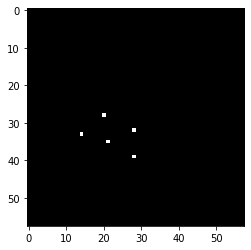

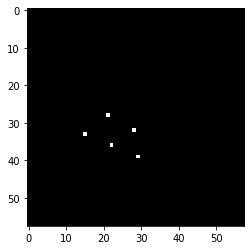

[1.0, 0.0, 1.0, 1.4142135623730951, 1.0]
1.0



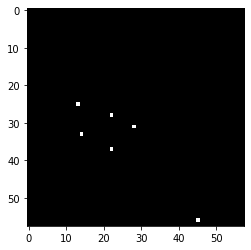

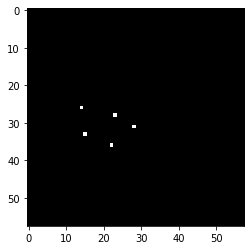

[1.4142135623730951, 1.0, 0.0, 1.0, 1.0, 30.23243291566195]
1.0



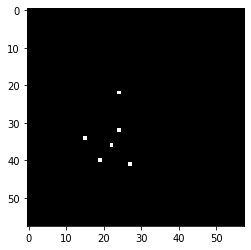

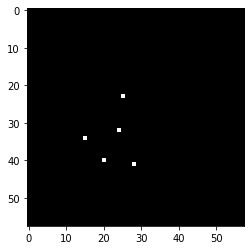

[1.4142135623730951, 0.0, 0.0, 4.47213595499958, 1.0, 1.0]
1.0



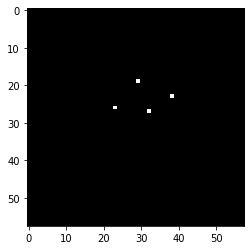

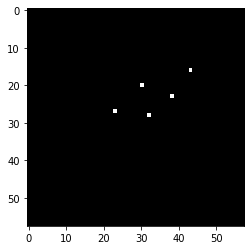

[1.4142135623730951, 0.0, 1.0, 1.0]
0.8



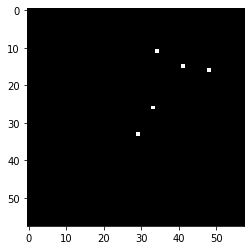

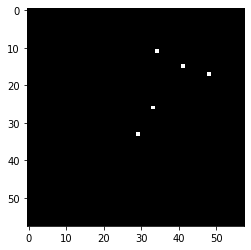

[0.0, 0.0, 1.0, 0.0, 0.0]
1.0



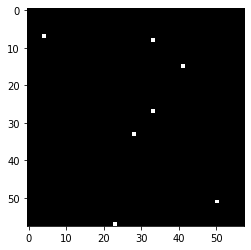

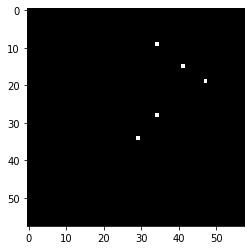

[30.066592756745816, 1.4142135623730951, 0.0, 1.4142135623730951, 1.4142135623730951, 27.018512172212592, 23.769728648009426]
0.8



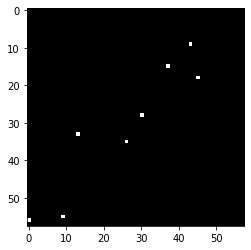

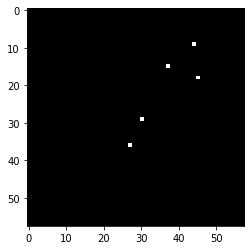

[1.0, 0.0, 0.0, 1.0, 14.317821063276353, 1.4142135623730951, 26.1725046566048, 33.60059523282288]
1.0



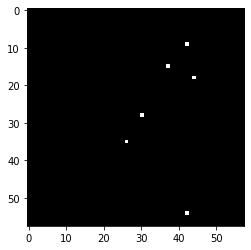

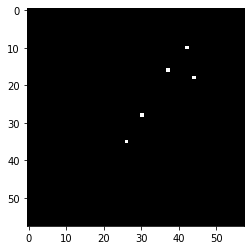

[1.0, 1.0, 0.0, 0.0, 0.0, 24.839484696748443]
1.0



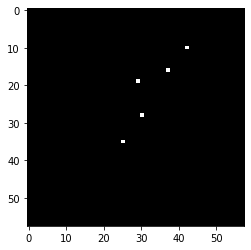

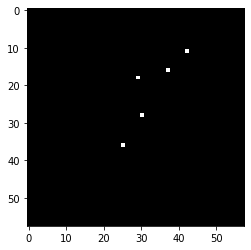

[1.0, 0.0, 1.0, 0.0, 1.0]
1.0



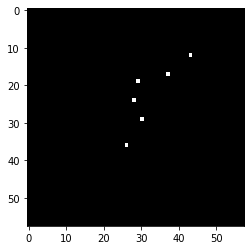

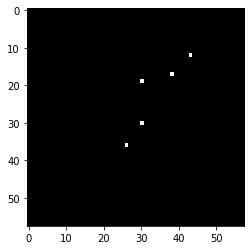

[0.0, 1.0, 1.0, 5.385164807134504, 1.0, 0.0]
1.0



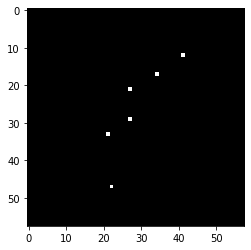

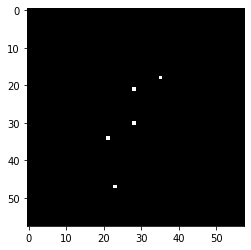

[8.48528137423857, 1.4142135623730951, 1.0, 1.4142135623730951, 1.0, 1.0]
1.0



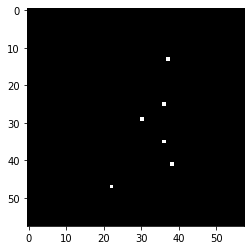

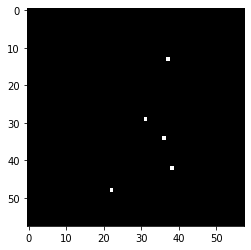

[0.0, 6.4031242374328485, 1.0, 1.0, 1.0, 1.0]
1.0



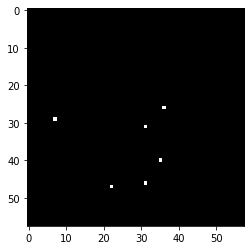

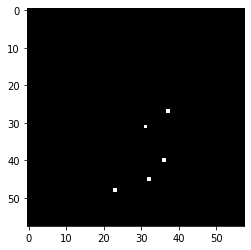

[1.4142135623730951, 24.08318915758459, 0.0, 1.0, 1.4142135623730951, 1.4142135623730951]
1.0



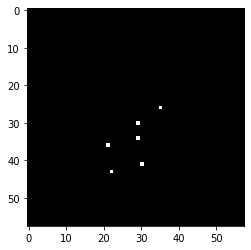

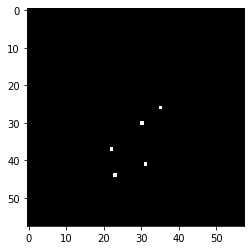

[0.0, 1.0, 4.123105625617661, 1.4142135623730951, 1.0, 1.4142135623730951]
1.0



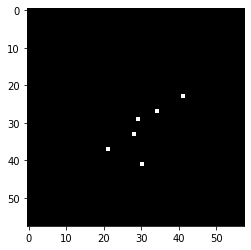

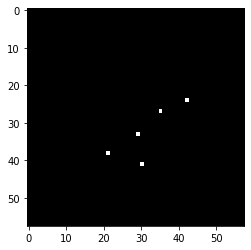

[1.4142135623730951, 1.0, 1.0, 1.0, 0.0]
1.0



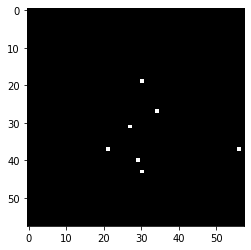

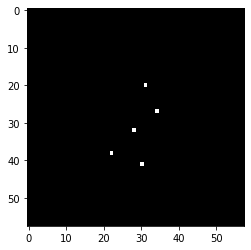

[1.4142135623730951, 0.0, 1.4142135623730951, 1.4142135623730951, 24.166091947189145, 1.4142135623730951, 10000]
1.0



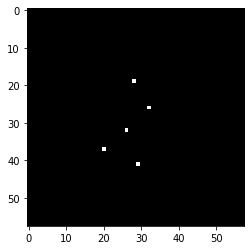

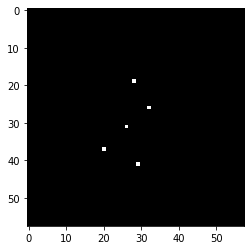

[0.0, 0.0, 1.0, 0.0, 0.0]
1.0



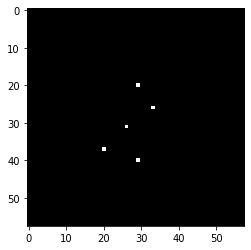

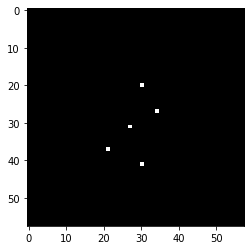

[1.0, 1.4142135623730951, 1.0, 1.0, 1.4142135623730951]
1.0



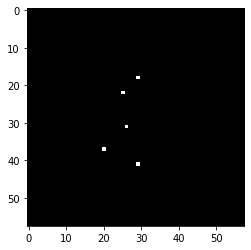

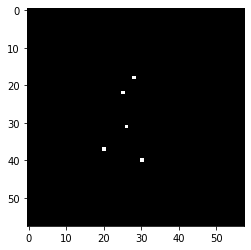

[1.0, 0.0, 0.0, 0.0, 1.4142135623730951]
1.0



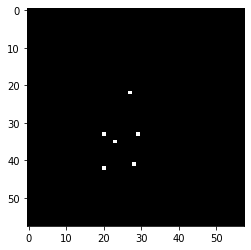

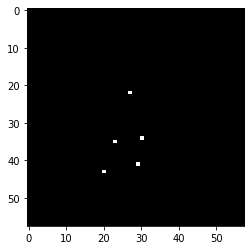

[0.0, 3.605551275463989, 1.4142135623730951, 1.0, 1.0]
1.0



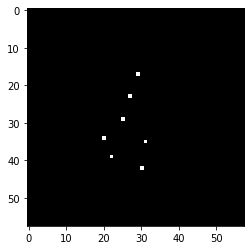

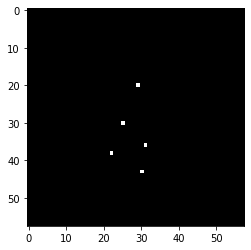

[3.0, 1.0, 4.47213595499958, 1.0, 1.0, 1.0]
1.0



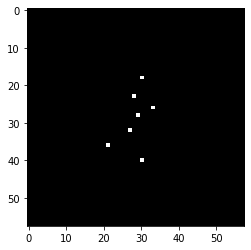

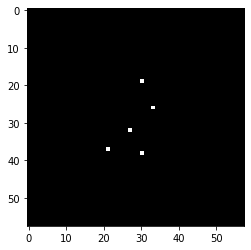

[1.0, 4.47213595499958, 0.0, 4.47213595499958, 0.0, 1.0, 2.0]
1.0



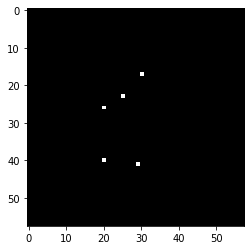

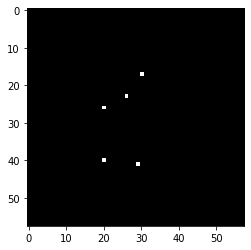

[0.0, 1.0, 0.0, 0.0, 0.0]
1.0



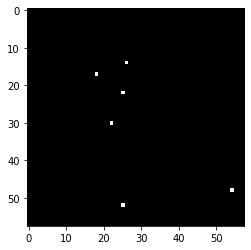

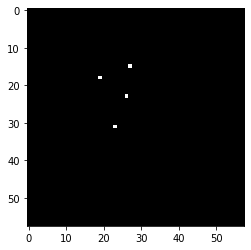

[1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 35.35533905932738, 21.095023109728988]
1.0



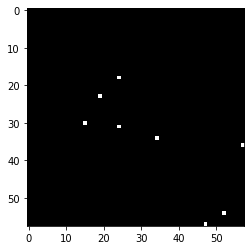

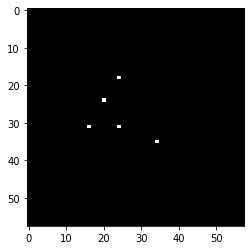

[0.0, 1.4142135623730951, 1.4142135623730951, 0.0, 1.0, 23.021728866442675, 26.1725046566048, 25.553864678361276]
1.0



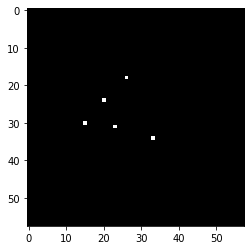

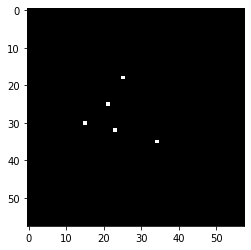

[1.0, 1.4142135623730951, 0.0, 1.0, 1.4142135623730951]
1.0



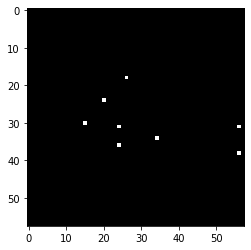

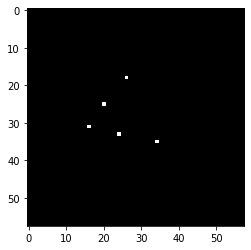

[0.0, 1.0, 1.4142135623730951, 2.0, 22.360679774997898, 1.0, 22.20360331117452]
1.0



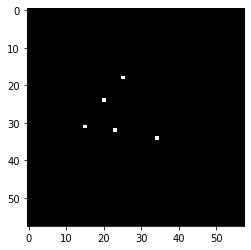

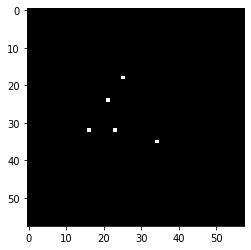

[0.0, 1.0, 1.4142135623730951, 0.0, 1.0]
1.0



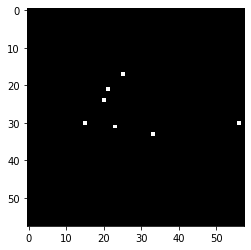

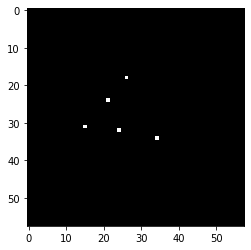

[1.4142135623730951, 3.0, 1.0, 22.360679774997898, 1.4142135623730951, 1.4142135623730951]
1.0



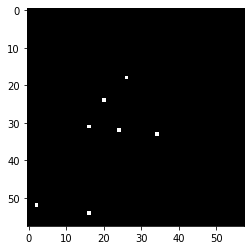

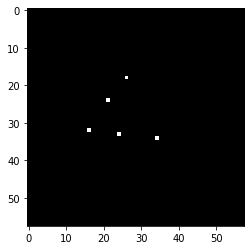

[0.0, 1.0, 1.0, 1.0, 1.0, 24.413111231467404, 22.0]
1.0



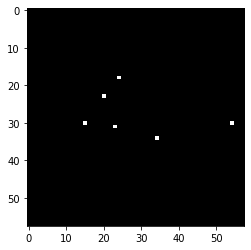

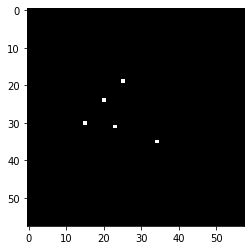

[1.4142135623730951, 1.0, 0.0, 20.615528128088304, 0.0, 1.0]
1.0



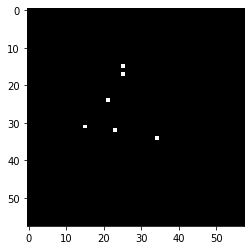

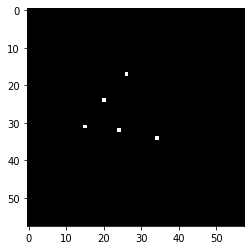

[2.23606797749979, 1.0, 0.0, 1.0, 0.0]
1.0



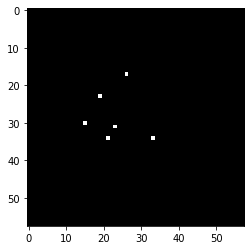

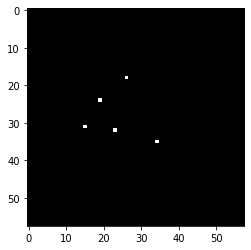

[1.0, 1.0, 1.0, 1.0, 1.4142135623730951]
1.0



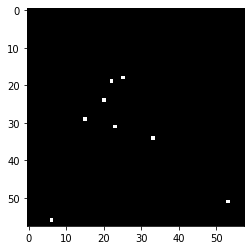

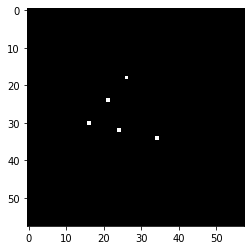

[1.0, 4.123105625617661, 1.0, 1.4142135623730951, 1.4142135623730951, 1.0, 25.495097567963924, 27.85677655436824]
1.0



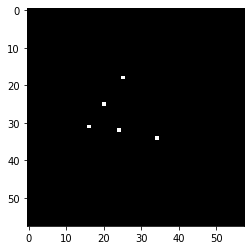

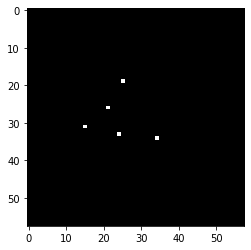

[1.0, 1.4142135623730951, 1.0, 1.0, 0.0]
1.0



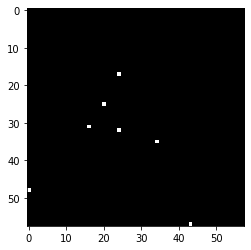

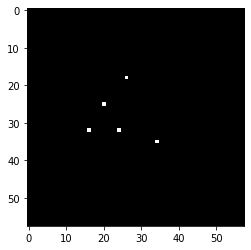

[2.23606797749979, 0.0, 1.0, 0.0, 0.0, 22.627416997969522, 23.769728648009426]
1.0



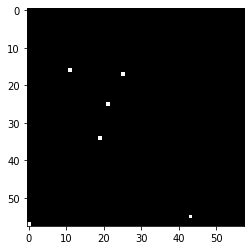

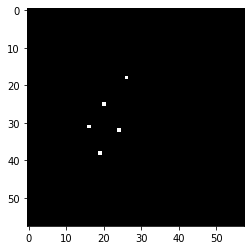

[12.727922061357855, 1.4142135623730951, 1.0, 29.410882339705484, 26.870057685088806]
0.4



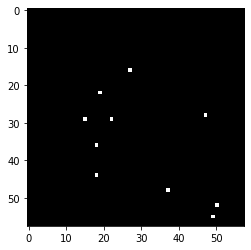

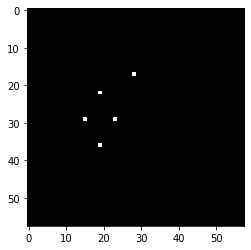

[1.4142135623730951, 0.0, 21.95449840010015, 0.0, 1.0, 1.0, 8.06225774829855, 21.633307652783937, 34.88552708502482, 35.510561809129406]
1.0



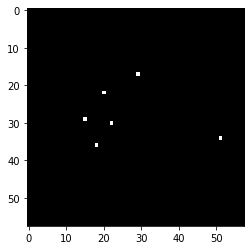

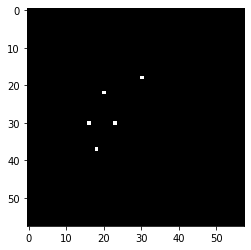

[1.4142135623730951, 0.0, 1.4142135623730951, 1.0, 26.40075756488817, 1.0]
1.0



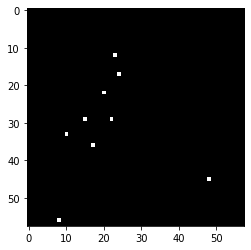

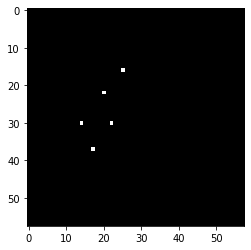

[4.47213595499958, 1.4142135623730951, 0.0, 1.4142135623730951, 1.0, 5.0, 1.0, 30.01666203960727, 21.02379604162864]
1.0



In [23]:
### block 7 ###
############# Auto thesholding ###############
# files=sorted(glob('./point_result/*.tif'))
files=[f'./point_result/{i}.tif' for i in range(120)]
dis=0
count=0
s=0

b_result=[]


bf_result=[]

# os.mkdir('./remake')
for f in files:
#     flag=int(f.split('T')[-1].split('.')[0])
#     print(flag)
    
#     os.rename(f,f'./point_result/{flag}.tif')
 
    count+=1
    gt=plt.imread(f)

    pd=plt.imread('./bernsen_result/'+f.split('/')[-1])
    gt_c=[]
    pd_c=[]
    plt.imshow(pd,'gray')
    plt.pause(0.01)
    plt.imshow(gt,'gray')
    plt.pause(0.01)    
#     print()
#     print()
    
    for i in range(len(gt)):
        for j in range(len(gt[0])):
            if gt[i][j]==255:
                gt_c.append([i,j])
            if pd[i][j]==255:
                pd_c.append([i,j])
#     print(len(pd_c))
#     print(len(gt_c))
    a=0
    a=[]
    sltd=[0 for _ in range(len(gt_c))]
    fp=0
    for i in range(len(pd_c)):
        d=[]
        for j in range(len(gt_c)):
            ds=np.linalg.norm(np.array(gt_c[j])-np.array(pd_c[i]))
            d.append(ds)
#         print(d)
        m_ds=min(d)
        index=d.index(m_ds)
#         print(m_ds,sltd)
        if m_ds<4 and sltd[index]==0:
            a.append(m_ds)
            sltd[index]+=1
        elif m_ds>4:
            fp+=1
            a.append(m_ds)
        elif ds<4 and sltd[index]!=0:
            a.append(10000)
            sltd[index]+=1
            fp+=1            
#             ds=np.linalg.norm(np.array(gt_c[j])-np.array(pd_c[i]))
#             d.append(ds)
# #             if ds<4 and sltd[j]==0:
# #                 d.append(ds)
# #                 sltd[j]=1
# #             elif ds<4 and sltd[j]!=0:
# #                 d.append(10000)
# #             elif ds>=4:
# #                 d.append(ds)

#         a.append(min(d))
    dd=0
    for i in a:
        if i<4:
            dd+=1
    if dd>len(gt_c):
        b_result.append(1.0)
    else:
        b_result.append(dd/len(gt_c))   
      
    print(a)
    print(b_result[-1])
    print()
  
    bf_result.append(max(len(pd_c)-dd,len(pd_c)-len(gt_c)))
 
  
#     print(a)
#     if max(a)>2:
#         shutil.copy(f,'./remake')
    





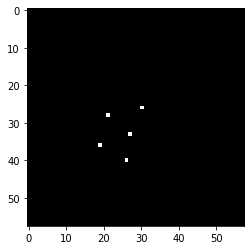

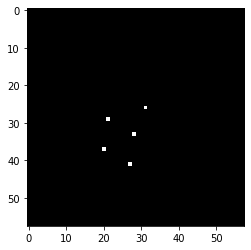

5
5
[1.0, 1.0, 1.0, 1.4142135623730951, 1.4142135623730951]
1.0



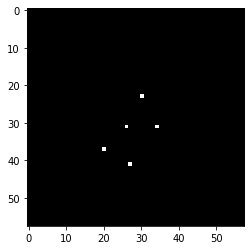

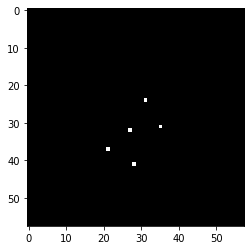

5
5
[1.4142135623730951, 1.4142135623730951, 1.0, 1.0, 1.0]
1.0



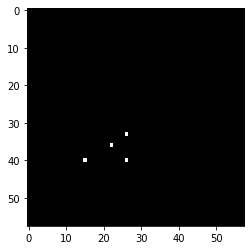

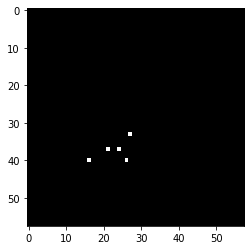

4
5
[1.0, 1.4142135623730951, 1.0, 0.0]
0.8



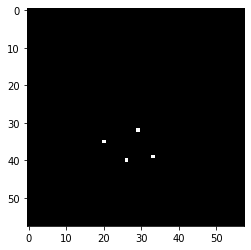

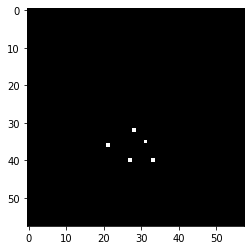

4
5
[1.0, 1.4142135623730951, 1.0, 1.0]
0.8



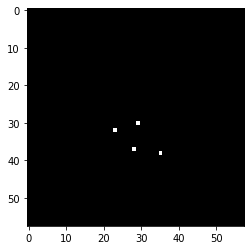

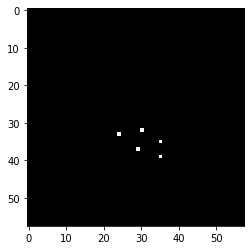

4
5
[2.23606797749979, 1.4142135623730951, 1.0, 1.0]
0.8



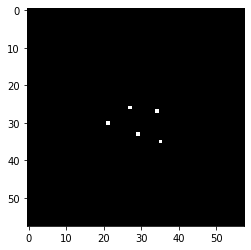

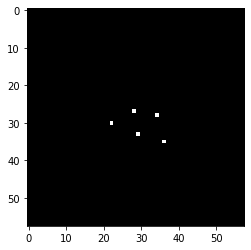

5
5
[1.4142135623730951, 1.0, 1.0, 0.0, 1.0]
1.0



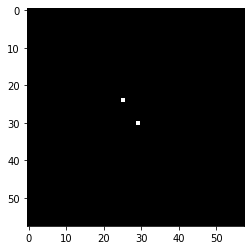

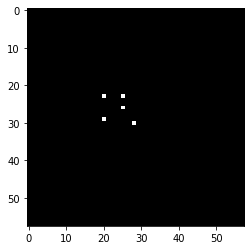

2
5
[1.0, 1.0]
0.4



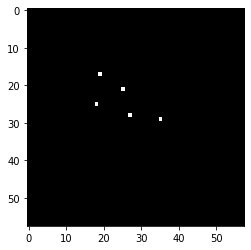

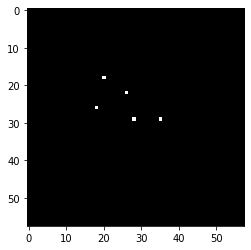

5
5
[1.4142135623730951, 1.4142135623730951, 1.0, 1.4142135623730951, 0.0]
1.0



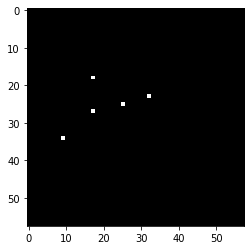

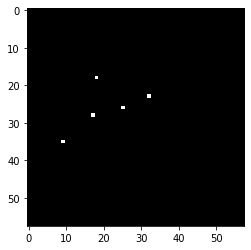

5
5
[1.0, 0.0, 1.0, 1.0, 1.0]
1.0



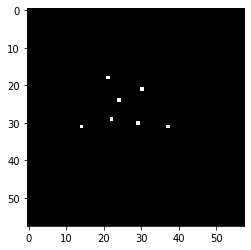

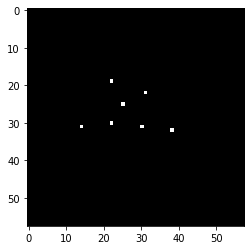

7
7
[1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.0, 1.4142135623730951, 0.0, 1.4142135623730951]
1.0



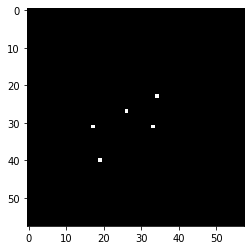

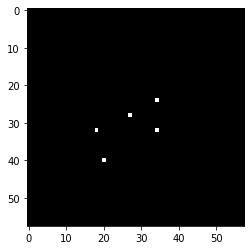

5
5
[1.0, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.0]
1.0



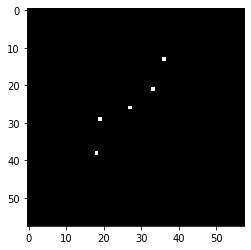

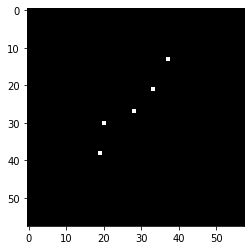

5
5
[1.0, 0.0, 1.4142135623730951, 1.4142135623730951, 1.0]
1.0



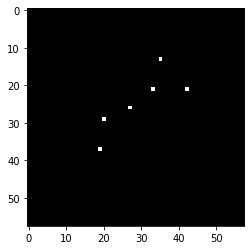

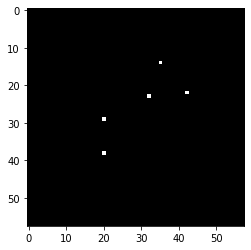

5
5
[1.0, 2.23606797749979, 1.0, 5.830951894845301, 0.0, 1.4142135623730951]
1.0



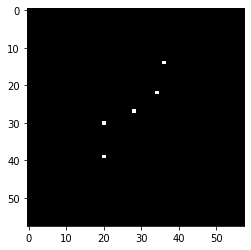

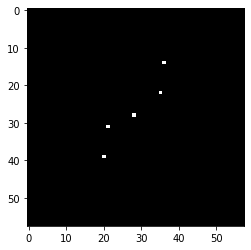

5
5
[0.0, 1.0, 1.0, 1.4142135623730951, 0.0]
1.0



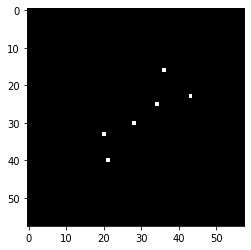

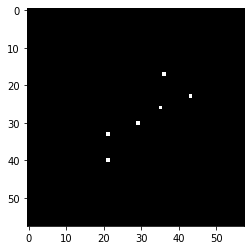

6
6
[1.0, 0.0, 1.4142135623730951, 1.0, 1.0, 0.0]
1.0



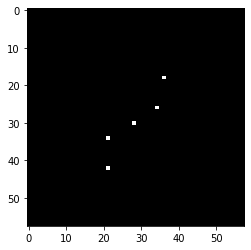

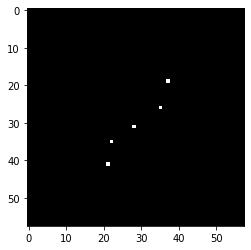

5
5
[1.4142135623730951, 1.0, 1.0, 1.4142135623730951, 1.0]
1.0



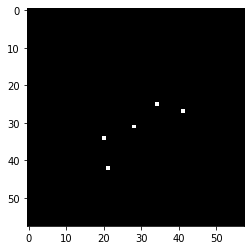

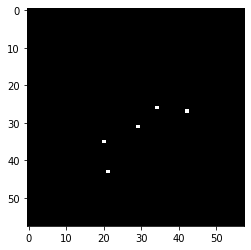

5
5
[1.0, 1.0, 1.0, 1.0, 1.0]
1.0



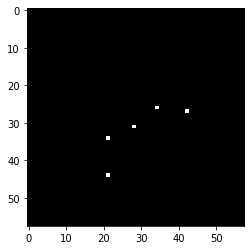

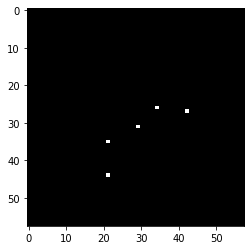

5
5
[0.0, 0.0, 1.0, 1.0, 0.0]
1.0



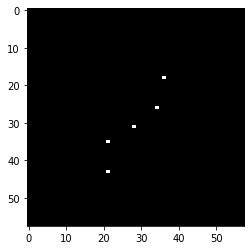

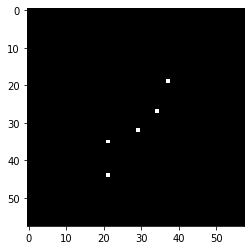

5
5
[1.4142135623730951, 1.0, 1.4142135623730951, 0.0, 1.0]
1.0



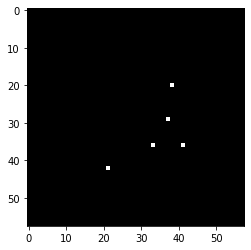

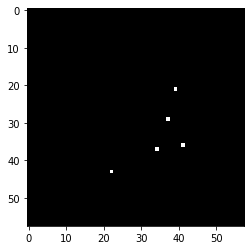

5
5
[1.4142135623730951, 0.0, 1.4142135623730951, 0.0, 1.4142135623730951]
1.0



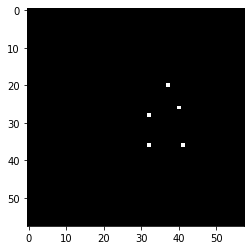

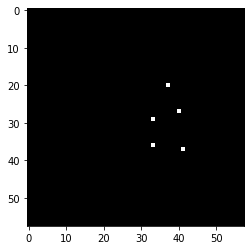

5
5
[0.0, 1.0, 1.4142135623730951, 1.0, 1.0]
1.0



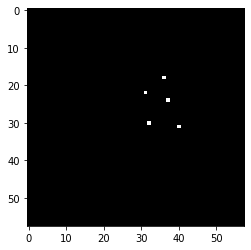

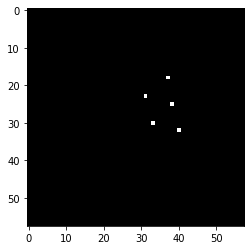

5
5
[1.0, 1.0, 1.4142135623730951, 1.0, 1.0]
1.0



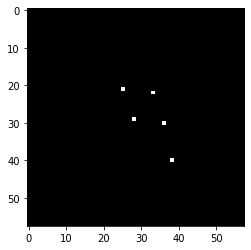

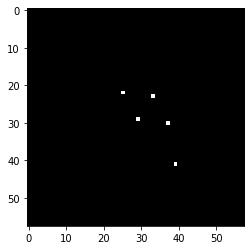

5
5
[1.0, 1.0, 1.0, 1.0, 1.4142135623730951]
1.0



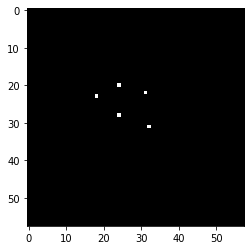

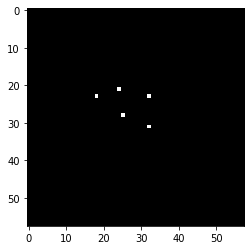

5
5
[1.0, 1.4142135623730951, 0.0, 1.0, 0.0]
1.0



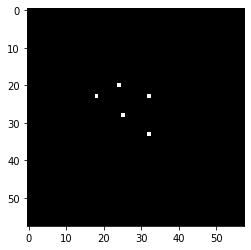

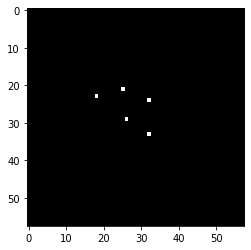

5
5
[1.4142135623730951, 0.0, 1.0, 1.4142135623730951, 0.0]
1.0



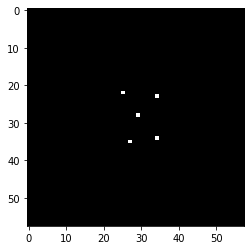

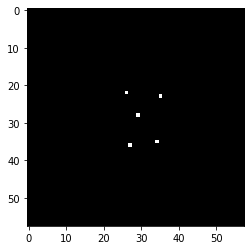

5
5
[1.0, 1.0, 0.0, 1.0, 1.0]
1.0



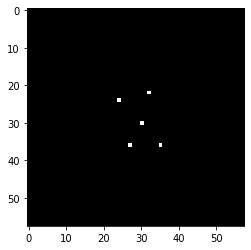

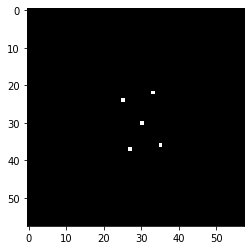

5
5
[1.0, 1.0, 0.0, 1.0, 0.0]
1.0



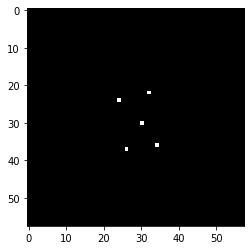

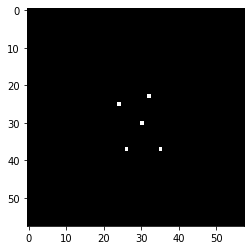

5
5
[1.0, 1.0, 0.0, 1.4142135623730951, 0.0]
1.0



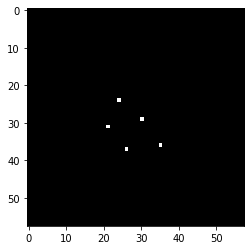

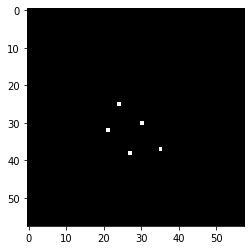

5
5
[1.0, 1.0, 1.0, 1.0, 1.4142135623730951]
1.0



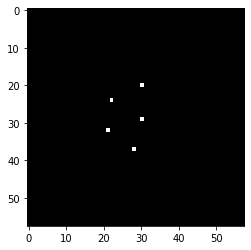

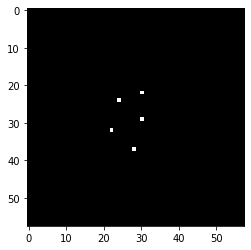

5
5
[2.0, 2.0, 0.0, 1.0, 0.0]
1.0



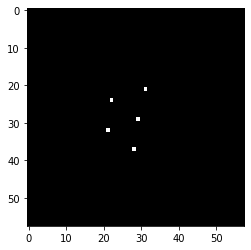

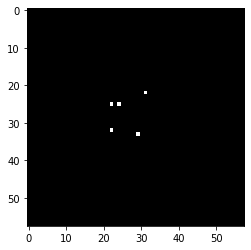

3
5
[1.0, 1.0, 1.0, 4.123105625617661]
0.6



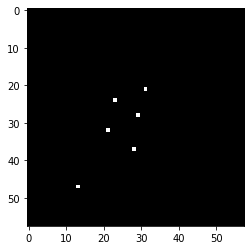

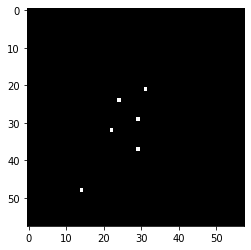

6
6
[0.0, 1.0, 1.0, 1.0, 1.0, 1.4142135623730951]
1.0



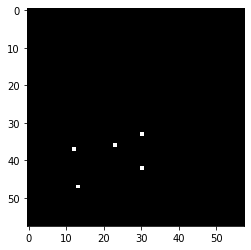

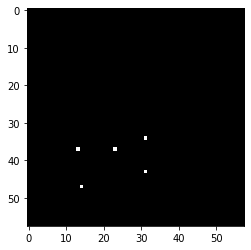

5
5
[1.4142135623730951, 1.0, 1.0, 1.4142135623730951, 1.0]
1.0



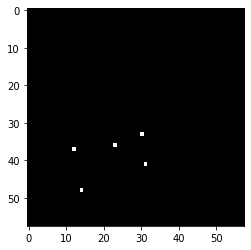

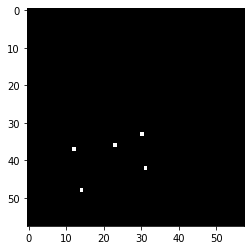

5
5
[0.0, 0.0, 0.0, 1.0, 0.0]
1.0



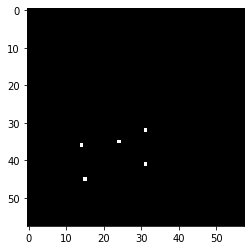

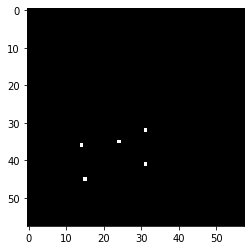

5
5
[0.0, 0.0, 0.0, 0.0, 0.0]
1.0



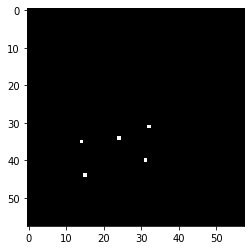

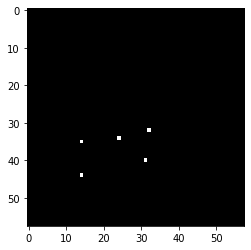

5
5
[1.0, 0.0, 0.0, 0.0, 1.0]
1.0



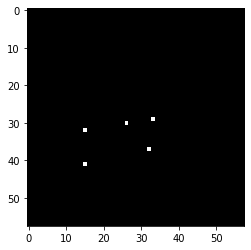

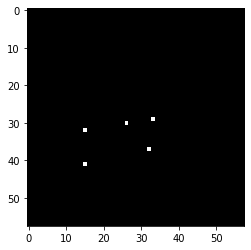

5
5
[0.0, 0.0, 0.0, 0.0, 0.0]
1.0



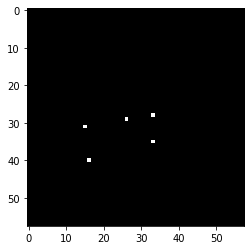

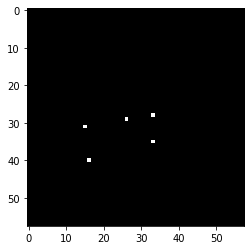

5
5
[0.0, 0.0, 0.0, 0.0, 0.0]
1.0



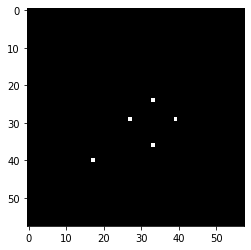

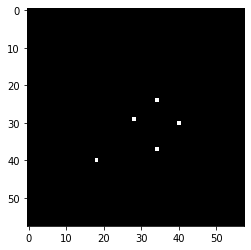

5
5
[1.0, 1.0, 1.4142135623730951, 1.4142135623730951, 1.0]
1.0



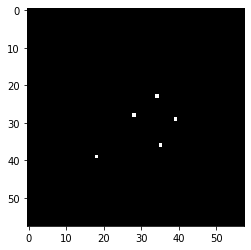

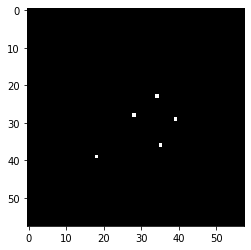

5
5
[0.0, 0.0, 0.0, 0.0, 0.0]
1.0



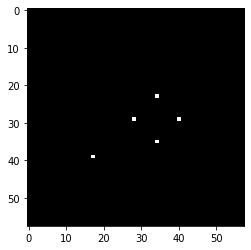

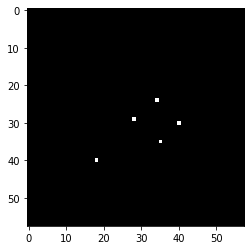

5
5
[1.0, 0.0, 1.0, 1.0, 1.4142135623730951]
1.0



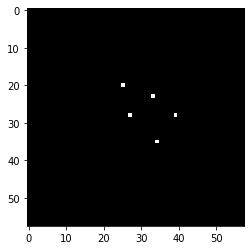

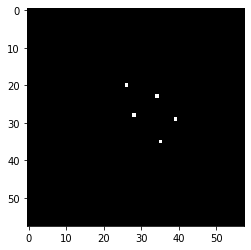

5
5
[1.0, 1.0, 1.0, 1.0, 1.0]
1.0



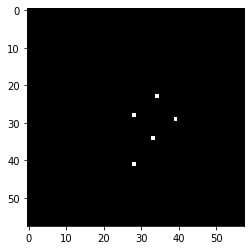

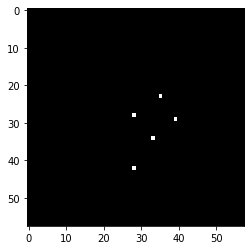

5
5
[1.0, 0.0, 0.0, 0.0, 1.0]
1.0



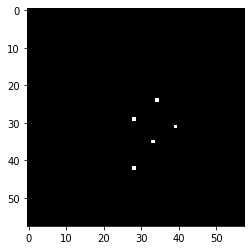

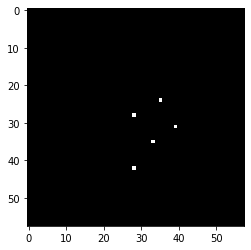

5
5
[1.0, 1.0, 0.0, 0.0, 0.0]
1.0



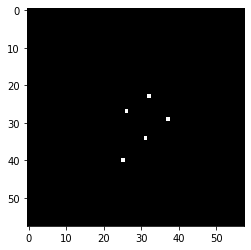

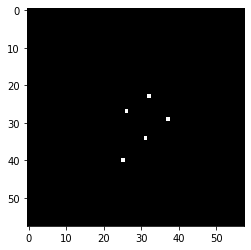

5
5
[0.0, 0.0, 0.0, 0.0, 0.0]
1.0



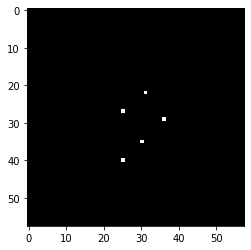

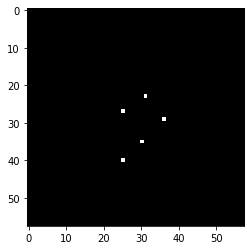

5
5
[1.0, 0.0, 0.0, 0.0, 0.0]
1.0



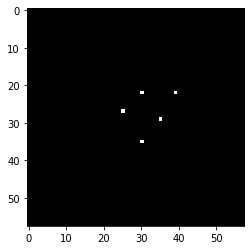

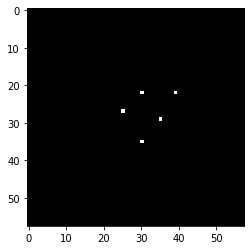

5
5
[0.0, 0.0, 0.0, 0.0, 0.0]
1.0



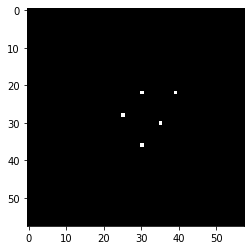

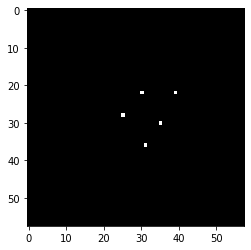

5
5
[0.0, 0.0, 0.0, 0.0, 1.0]
1.0



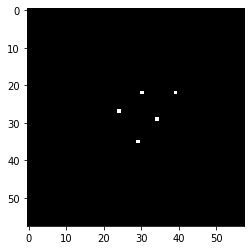

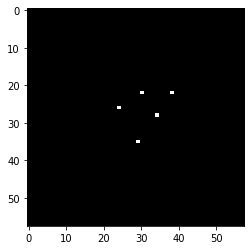

5
5
[0.0, 1.0, 1.0, 1.0, 0.0]
1.0



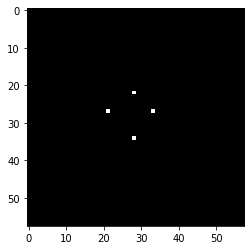

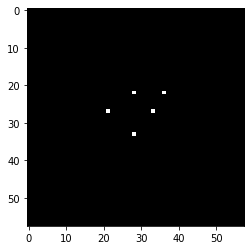

4
5
[0.0, 0.0, 0.0, 1.0]
0.8



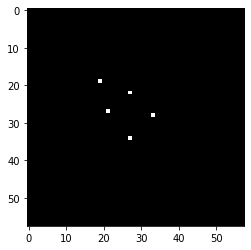

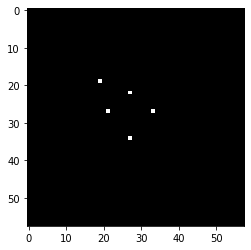

5
5
[0.0, 0.0, 0.0, 1.0, 0.0]
1.0



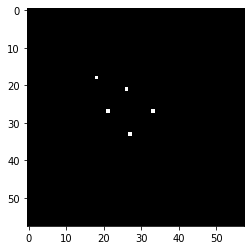

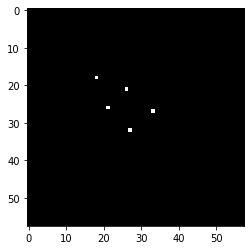

5
5
[0.0, 0.0, 1.0, 0.0, 1.0]
1.0



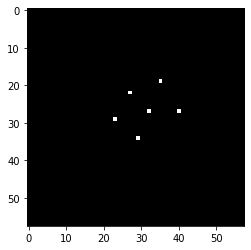

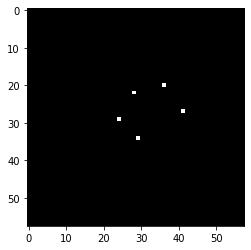

5
5
[1.4142135623730951, 1.0, 6.4031242374328485, 1.0, 1.0, 0.0]
1.0



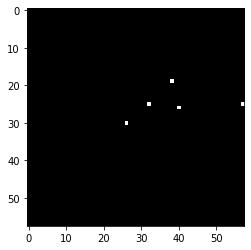

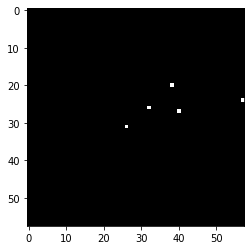

5
5
[1.0, 1.0, 1.0, 1.0, 1.0]
1.0



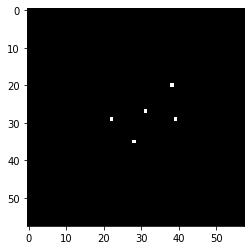

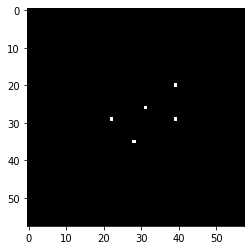

5
5
[1.0, 1.0, 0.0, 0.0, 0.0]
1.0



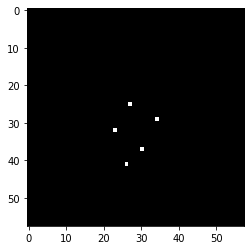

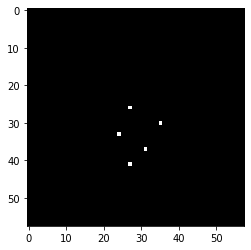

5
5
[1.0, 1.4142135623730951, 1.4142135623730951, 1.0, 1.0]
1.0



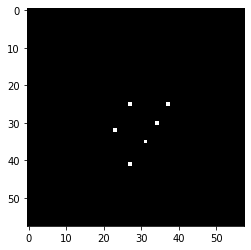

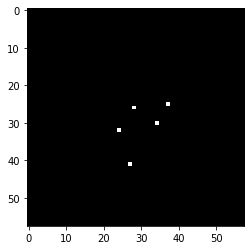

5
5
[1.4142135623730951, 0.0, 0.0, 1.0, 5.830951894845301, 0.0]
1.0



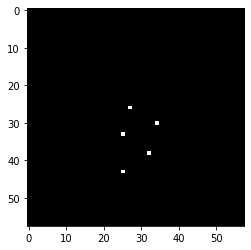

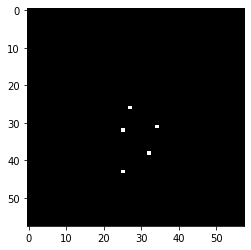

5
5
[0.0, 1.0, 1.0, 0.0, 0.0]
1.0



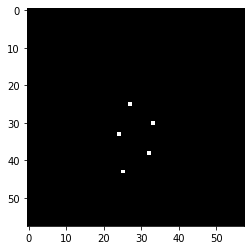

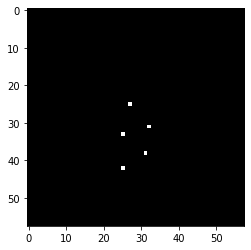

5
5
[0.0, 1.4142135623730951, 1.0, 1.0, 1.0]
1.0



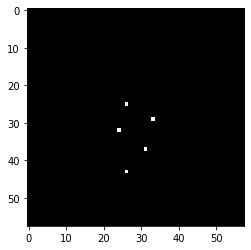

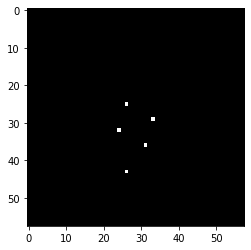

5
5
[0.0, 0.0, 0.0, 1.0, 0.0]
1.0



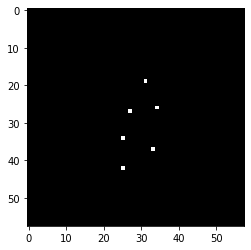

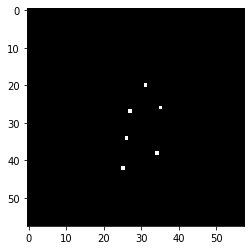

6
6
[1.0, 1.0, 0.0, 1.0, 1.4142135623730951, 0.0]
1.0



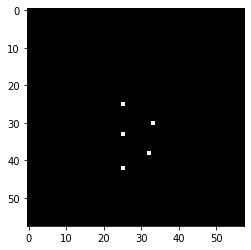

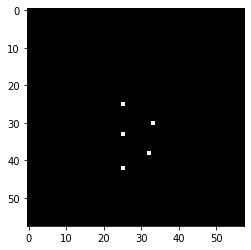

5
5
[0.0, 0.0, 0.0, 0.0, 0.0]
1.0



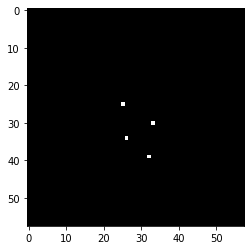

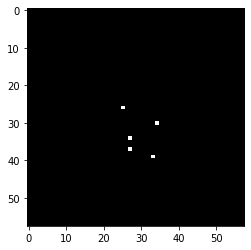

4
5
[1.0, 1.0, 1.0, 1.0]
0.8



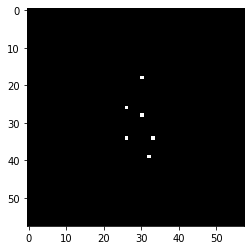

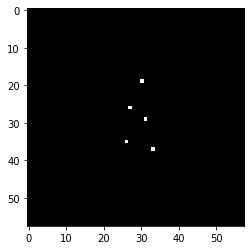

5
5
[1.0, 1.0, 1.4142135623730951, 1.0, 3.0, 10000]
1.0



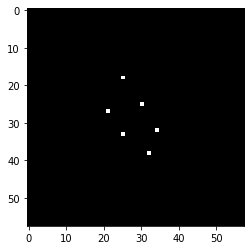

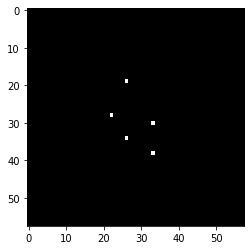

5
5
[1.4142135623730951, 5.830951894845301, 1.4142135623730951, 2.23606797749979, 1.4142135623730951, 1.0]
1.0



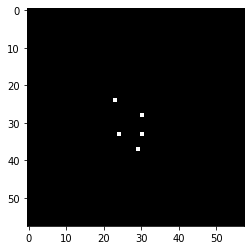

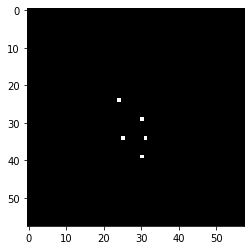

5
5
[1.0, 1.0, 1.4142135623730951, 1.4142135623730951, 2.23606797749979]
1.0



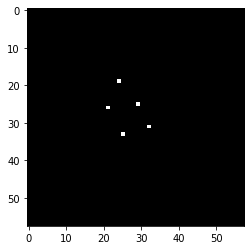

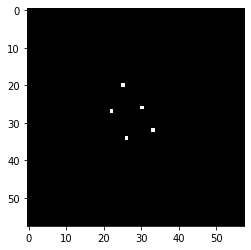

5
5
[1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951]
1.0



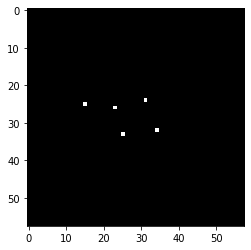

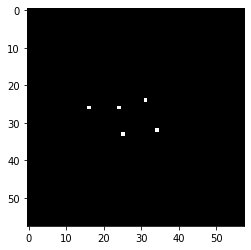

5
5
[0.0, 1.4142135623730951, 1.0, 0.0, 0.0]
1.0



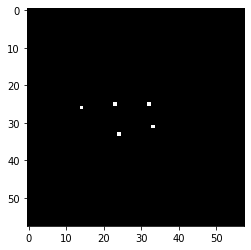

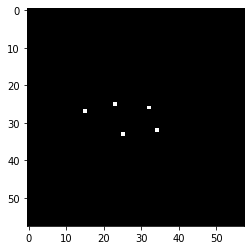

5
5
[0.0, 1.0, 1.4142135623730951, 1.4142135623730951, 1.0]
1.0



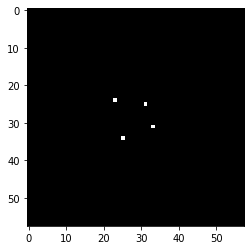

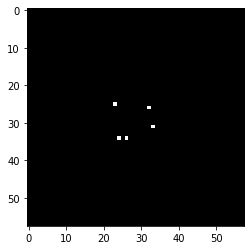

4
5
[1.0, 1.4142135623730951, 0.0, 1.0]
0.8



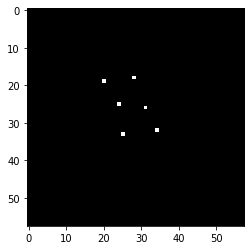

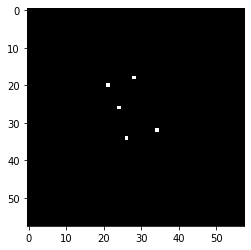

5
5
[0.0, 1.4142135623730951, 1.0, 6.708203932499369, 0.0, 1.4142135623730951]
1.0



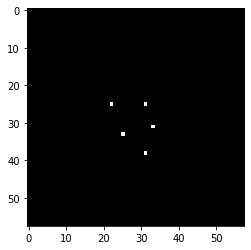

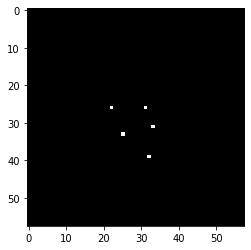

5
5
[1.0, 1.0, 0.0, 0.0, 1.4142135623730951]
1.0



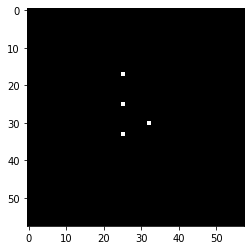

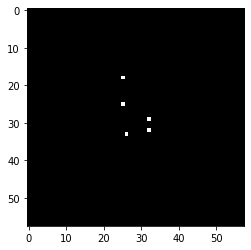

4
5
[1.0, 0.0, 1.0, 1.0]
0.8



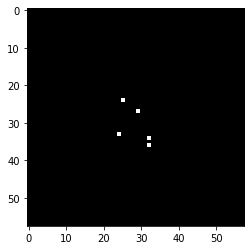

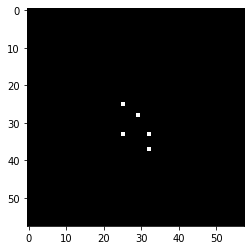

5
5
[1.0, 1.0, 1.0, 1.0, 1.0]
1.0



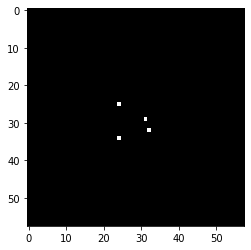

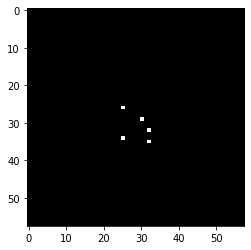

4
5
[1.4142135623730951, 1.0, 0.0, 1.0]
0.8



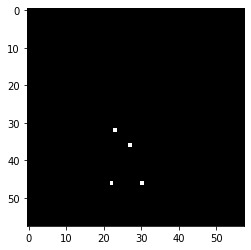

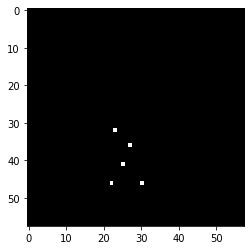

4
5
[0.0, 0.0, 0.0, 0.0]
0.8



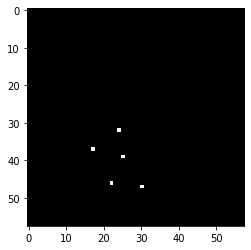

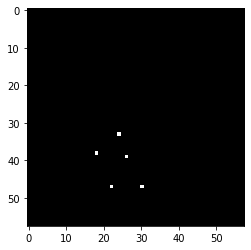

5
5
[1.0, 1.4142135623730951, 1.0, 1.0, 0.0]
1.0



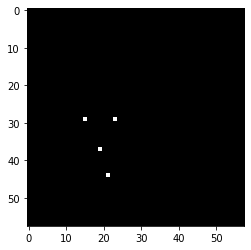

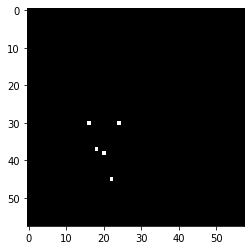

4
5
[1.4142135623730951, 1.4142135623730951, 1.0, 1.4142135623730951]
0.8



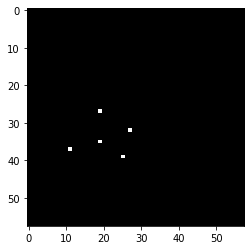

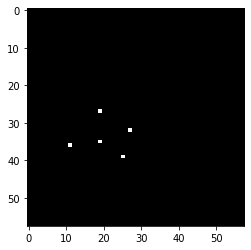

5
5
[0.0, 0.0, 0.0, 1.0, 0.0]
1.0



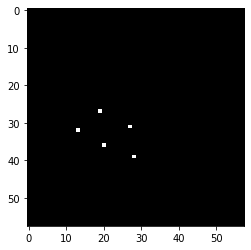

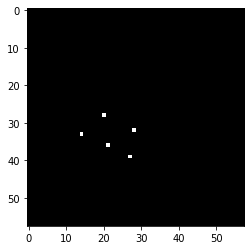

5
5
[1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.0, 1.0]
1.0



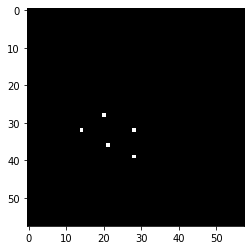

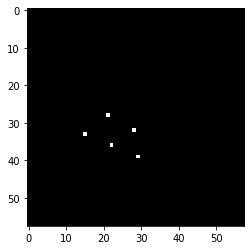

5
5
[1.0, 1.4142135623730951, 0.0, 1.0, 1.0]
1.0



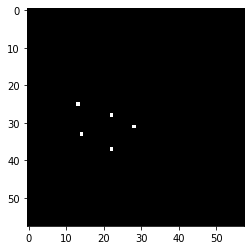

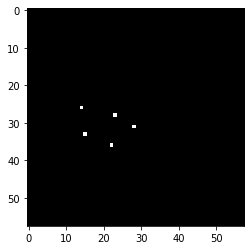

5
5
[1.4142135623730951, 1.0, 0.0, 1.0, 1.0]
1.0



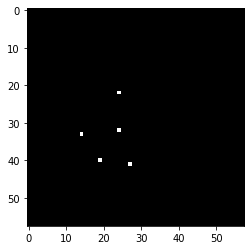

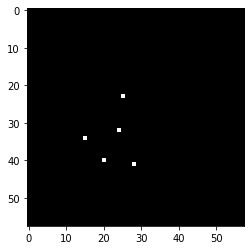

5
5
[1.4142135623730951, 0.0, 1.4142135623730951, 1.0, 1.0]
1.0



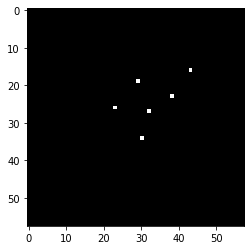

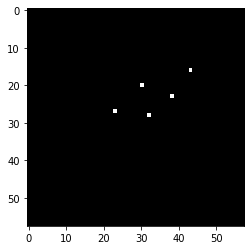

5
5
[0.0, 1.4142135623730951, 0.0, 1.0, 1.0, 6.324555320336759]
1.0



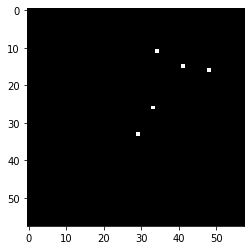

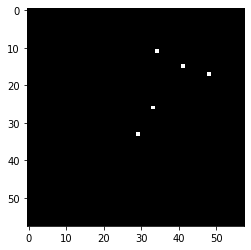

5
5
[0.0, 0.0, 1.0, 0.0, 0.0]
1.0



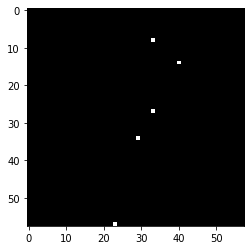

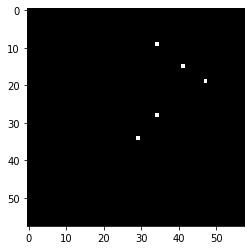

4
5
[1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 0.0, 23.769728648009426]
0.8



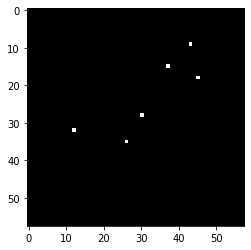

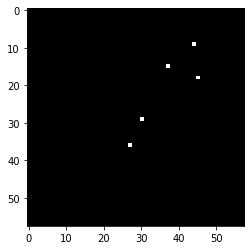

5
5
[1.0, 0.0, 0.0, 1.0, 15.524174696260024, 1.4142135623730951]
1.0



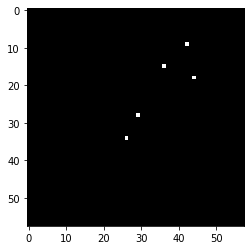

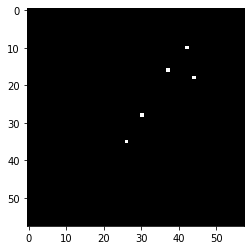

5
5
[1.0, 1.4142135623730951, 0.0, 1.0, 1.0]
1.0



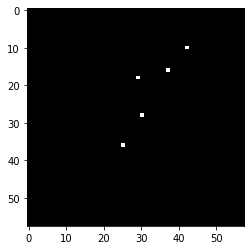

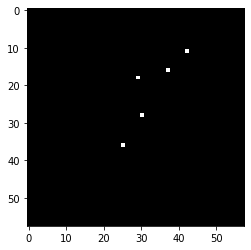

5
5
[1.0, 0.0, 0.0, 0.0, 0.0]
1.0



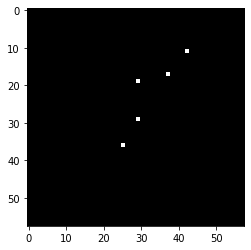

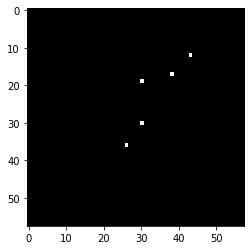

5
5
[1.4142135623730951, 1.0, 1.0, 1.4142135623730951, 1.0]
1.0



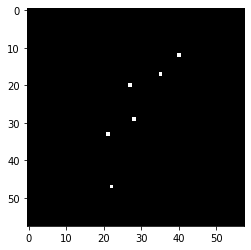

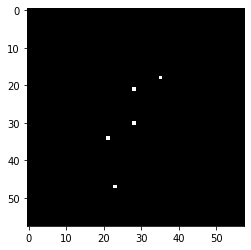

5
5
[7.810249675906654, 1.0, 1.4142135623730951, 1.0, 1.0, 1.0]
1.0



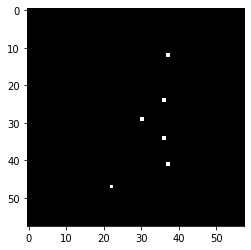

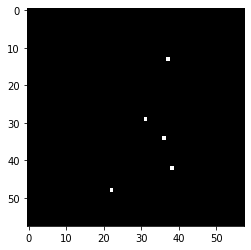

5
5
[1.0, 7.0710678118654755, 1.0, 0.0, 1.4142135623730951, 1.0]
1.0



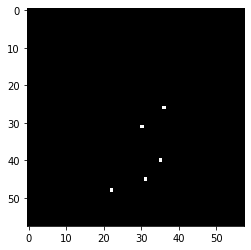

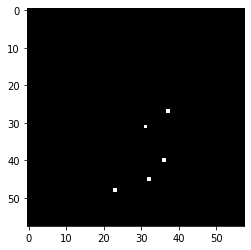

5
5
[1.4142135623730951, 1.0, 1.0, 1.0, 1.0]
1.0



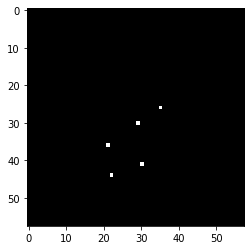

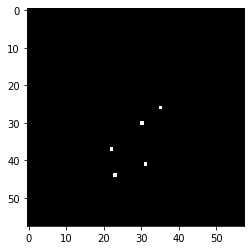

5
5
[0.0, 1.0, 1.4142135623730951, 1.0, 1.0]
1.0



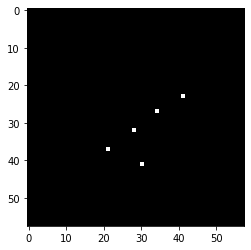

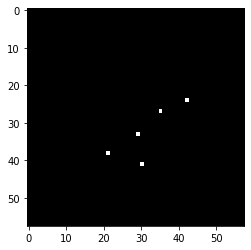

5
5
[1.4142135623730951, 1.0, 1.4142135623730951, 1.0, 0.0]
1.0



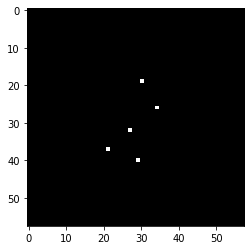

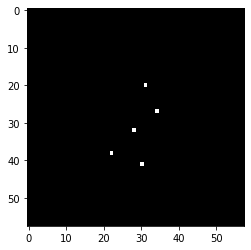

5
5
[1.4142135623730951, 1.0, 1.0, 1.4142135623730951, 1.4142135623730951]
1.0



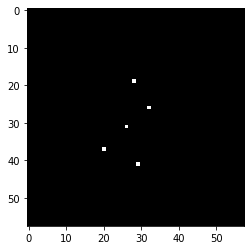

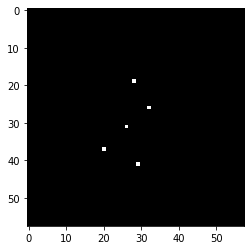

5
5
[0.0, 0.0, 0.0, 0.0, 0.0]
1.0



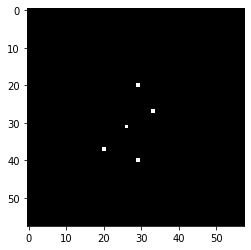

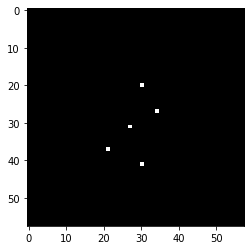

5
5
[1.0, 1.0, 1.0, 1.0, 1.4142135623730951]
1.0



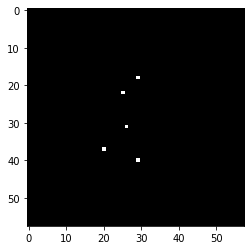

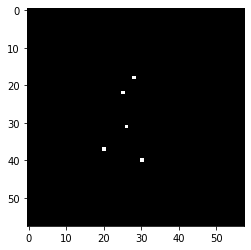

5
5
[1.0, 0.0, 0.0, 0.0, 1.0]
1.0



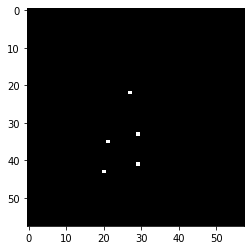

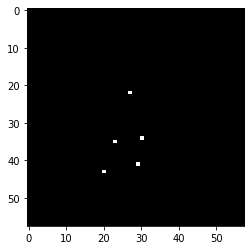

5
5
[0.0, 1.4142135623730951, 2.0, 0.0, 0.0]
1.0



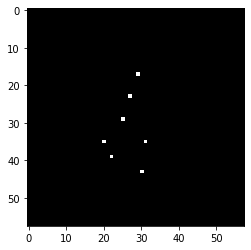

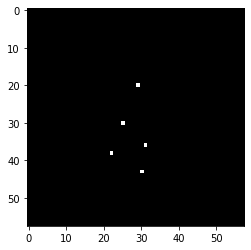

5
5
[3.0, 1.0, 3.605551275463989, 1.0, 0.0]
1.0



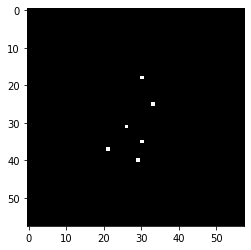

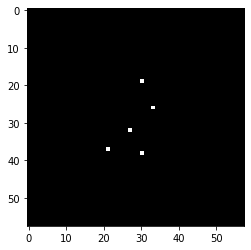

5
5
[1.0, 1.0, 1.4142135623730951, 3.0, 0.0, 10000]
1.0



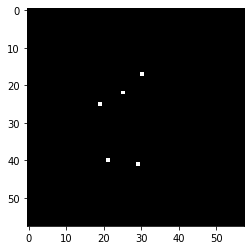

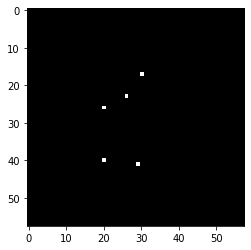

5
5
[0.0, 1.4142135623730951, 1.4142135623730951, 1.0, 0.0]
1.0



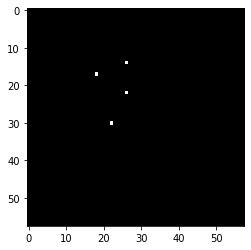

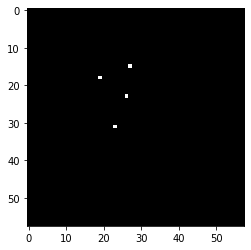

4
4
[1.4142135623730951, 1.4142135623730951, 1.0, 1.4142135623730951]
1.0



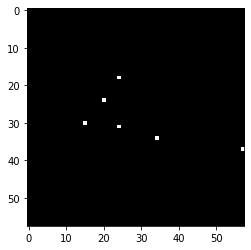

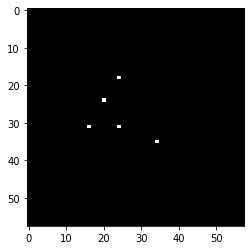

5
5
[0.0, 0.0, 1.4142135623730951, 0.0, 1.0, 23.08679276123039]
1.0



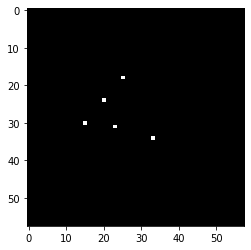

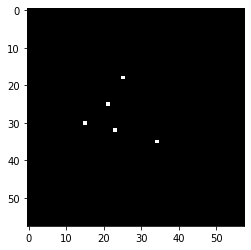

5
5
[0.0, 1.4142135623730951, 0.0, 1.0, 1.4142135623730951]
1.0



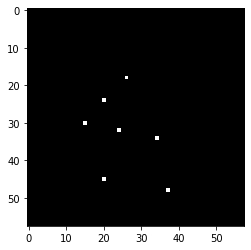

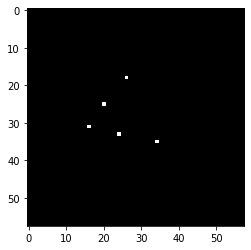

5
5
[0.0, 1.0, 1.4142135623730951, 1.0, 1.0, 12.649110640673518, 13.341664064126334]
1.0



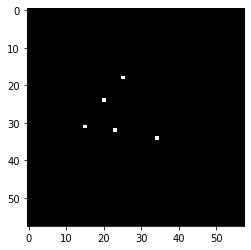

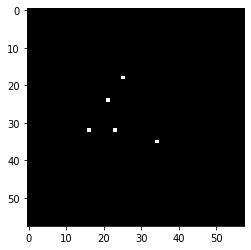

5
5
[0.0, 1.0, 1.4142135623730951, 0.0, 1.0]
1.0



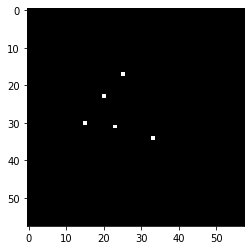

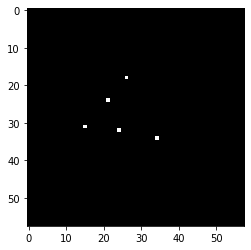

5
5
[1.4142135623730951, 1.4142135623730951, 1.0, 1.4142135623730951, 1.0]
1.0



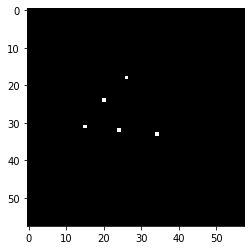

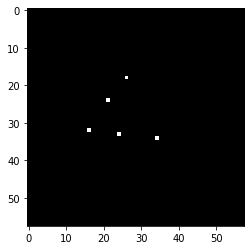

5
5
[0.0, 1.0, 1.4142135623730951, 1.0, 1.0]
1.0



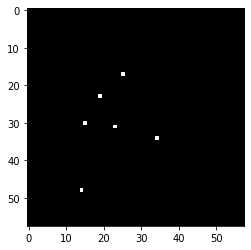

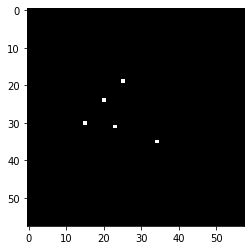

5
5
[2.0, 1.4142135623730951, 0.0, 0.0, 1.0, 18.027756377319946]
1.0



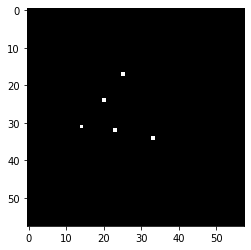

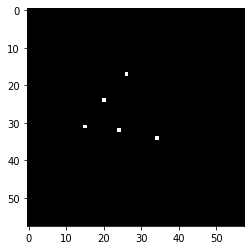

5
5
[1.0, 0.0, 1.0, 1.0, 1.0]
1.0



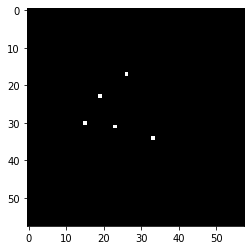

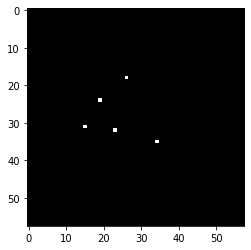

5
5
[1.0, 1.0, 1.0, 1.0, 1.4142135623730951]
1.0



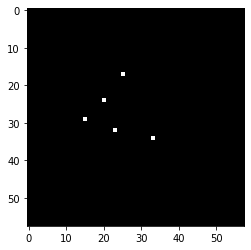

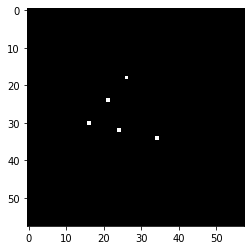

5
5
[1.4142135623730951, 1.0, 1.4142135623730951, 1.0, 1.0]
1.0



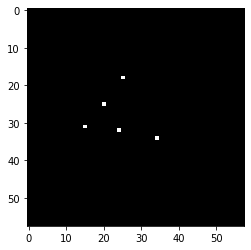

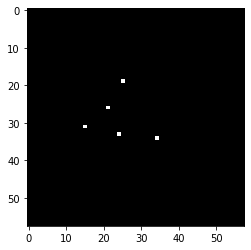

5
5
[1.0, 1.4142135623730951, 0.0, 1.0, 0.0]
1.0



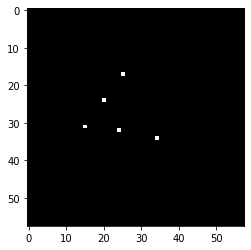

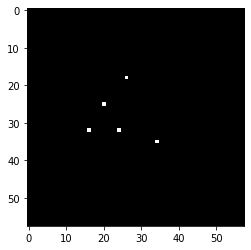

5
5
[1.4142135623730951, 1.0, 1.4142135623730951, 0.0, 1.0]
1.0



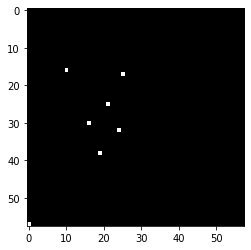

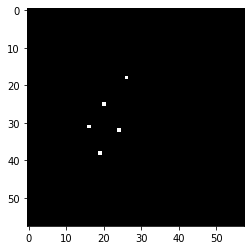

5
5
[13.45362404707371, 1.4142135623730951, 1.0, 1.0, 0.0, 0.0, 26.870057685088806]
1.0



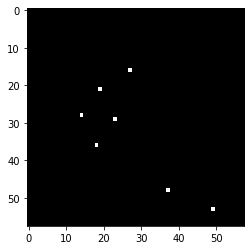

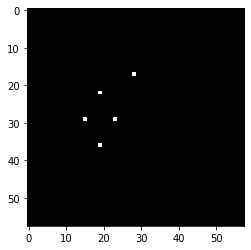

5
5
[1.4142135623730951, 1.0, 1.4142135623730951, 0.0, 1.0, 21.633307652783937, 34.48187929913333]
1.0



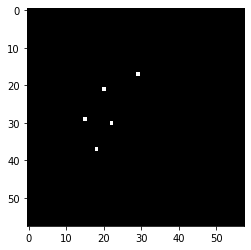

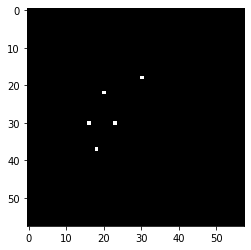

5
5
[1.4142135623730951, 1.0, 1.4142135623730951, 1.0, 0.0]
1.0



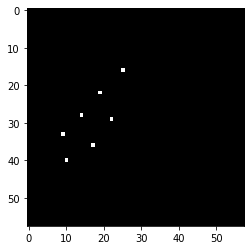

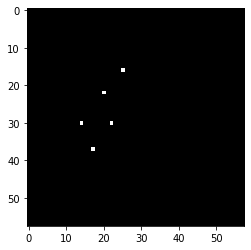

5
5
[0.0, 1.0, 2.0, 1.0, 5.830951894845301, 1.0, 7.615773105863909]
1.0



In [116]:
### block 4 ###
############### LOG ################
# files=sorted(glob('./point_result/*.tif'))
files=[f'./point_result/{i}.tif' for i in range(120)]
dis=0
count=0
s=0


l_result=[]


lf_result=[]
# os.mkdir('./remake')
for f in files:
#     flag=int(f.split('T')[-1].split('.')[0])
#     print(flag)
    
#     os.rename(f,f'./point_result/{flag}.tif')
 
    count+=1
    gt=plt.imread(f)

    pd=plt.imread('./LoG_result/'+f.split('/')[-1])
    pd=cv2.cvtColor(pd,cv2.COLOR_BGR2GRAY)
    gt_c=[]
    pd_c=[]
    plt.imshow(pd,'gray')
    plt.pause(0.01)
    plt.imshow(gt,'gray')
    plt.pause(0.01)    
#     print()
#     print()
    for i in range(len(gt)):
        for j in range(len(gt[0])):
            if gt[i][j]==255:
                gt_c.append([i,j])
            if pd[i][j]==255:
                pd_c.append([i,j])
#     print(len(pd_c))
#     print(len(gt_c))
    a=0
    a=[]
    sltd=[0 for _ in range(len(gt_c))]
    fp=0
    for i in range(len(pd_c)):
        d=[]
        for j in range(len(gt_c)):
            ds=np.linalg.norm(np.array(gt_c[j])-np.array(pd_c[i]))
            d.append(ds)
#         print(d)
        m_ds=min(d)
        index=d.index(m_ds)
#         print(m_ds,sltd)
        if m_ds<4 and sltd[index]==0:
            a.append(m_ds)
            sltd[index]+=1
        elif m_ds>4:
            fp+=1
            a.append(m_ds)
        elif ds<4 and sltd[index]!=0:
            a.append(10000)
            sltd[index]+=1
            fp+=1
#     print(a)
#     print(fp)
#     print()
#             if ds<4 and sltd[j]==0:
#                 d.append(ds)
#                 sltd[j]=1
#             elif ds<4 and sltd[j]!=0:
#                 d.append(10000)
#             elif ds>=4:
#                 d.append(ds)


    dd=0
    for i in a:
        if i<4:
            dd+=1
    if dd>len(gt_c):
        l_result.append(1.0)
    else:
        l_result.append(dd/len(gt_c))

    print(dd)
    print(len(gt_c))
    lf_result.append(fp)
    print(a)
    print(l_result[-1])
    print() 
  
#     print(a)
#     if max(a)>2:
#         shutil.copy(f,'./remake')


g_result
b_result
[1.0, 1.0, 0.8, 0.8, 0.8, 1.0, 0.4, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 1.0, 1.0, 0.8, 0.8, 0.6, 1.0, 0.8, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.4, 1.0, 1.0, 1.0]
l_result


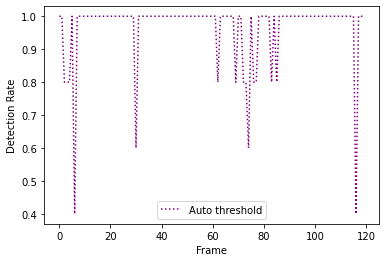

In [281]:
############ draw the plot of detection rate ###############
plot_sign={
    'color':{'g_result':'green','b_result':'purple','l_result':'blue',25:'purple',8:'pink'}}

name={'g_result':'GMM',
     'b_result':'Auto threshold',
     'l_result':'LoG'}
plt.xlabel('Frame')
plt.ylabel('Detection Rate')    
for s in ['g_result','b_result','l_result']:
    print(s)
    if s =='b_result':
      
        plt.plot(np.arange(120),eval(s)[:120],color=plot_sign['color'][s],ls=':',label=f'{name[s]}')
    elif s=='l_result':
#         plt.plot(np.arange(120),eval(s)[:120],color=plot_sign['color'][s],ls=':',label=f'{name[s]}')
        pass
    else:
#         plt.plot(np.arange(120),eval(s)[:120],color=plot_sign['color'][s],ls=':',label=f'{name[s]}')    
        pass
   
plt.legend() 
plt.savefig('./detection_rate.tif')
plt.show()

gf_result
bf_result
lf_result


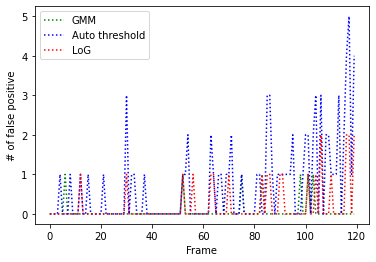

In [200]:
############ draw the plot of false positives number ###############
plot_sign={
    'color':{'gf_result':'green','bf_result':'blue','lf_result':'red',25:'purple',8:'pink'}}

name={'gf_result':'GMM',
     'bf_result':'Auto threshold',
     'lf_result':'LoG'}
plt.xlabel('Frame')
plt.ylabel('# of false positive')    
for s in ['gf_result','bf_result','lf_result']:
    print(s)
    if s =='bf_result':
        plt.plot(np.arange(120),eval(s)[:120],color=plot_sign['color'][s],ls=':',label=f'{name[s]}')
    elif s=='lf_result':
        plt.plot(np.arange(120),eval(s)[:120],color=plot_sign['color'][s],ls=':',label=f'{name[s]}')
    else:
        plt.plot(np.arange(120),eval(s)[:120],color=plot_sign['color'][s],ls=':',label=f'{name[s]}')
plt.legend() 
plt.savefig('./false_positive.tif')
plt.show()


In [16]:
##### block 2 #########


SpecialCovKernel= np.array([[0, 0, 1, 1, 1, 0, 0],
[0, 1, 1, 1, 1, 1, 0],
[1, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 1, 1, 1, 1],
[0, 1, 1, 1, 1, 1, 0],
[0, 0, 1, 1, 1, 0, 0],]
)



squares=[np.array([
[[0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0],
[0, 0, 1, 1, 1, 0, 0],
[0, 1, 1, 1, 1, 1, 0],
[0, 0, 1, 1, 1, 0, 0],
[0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0]] , 
    
[[0, 0, 0, 1, 0, 0, 0],
[0, 0, 1, 1, 1, 0, 0],
[0, 1, 1, 1, 1, 1, 0],
[1, 1, 1, 1, 1, 1, 1],
[0, 1, 1, 1, 1, 1, 0],
[0, 0, 1, 1, 1, 0, 0],
[0, 0, 0, 1, 0, 0, 0]] ,

[[0, 0, 1, 1, 1, 0, 0],
[0, 1, 1, 1, 1, 1, 0],
[1, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 1, 1, 1, 1],
[0, 1, 1, 1, 1, 1, 0],
[0, 0, 1, 1, 1, 0, 0]],    
    
    
[[0, 0, 1, 1, 1, 0, 0],
[0, 1, 1, 1, 1, 1, 0],
[1, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 1, 1, 1, 1],
[0, 1, 1, 1, 1, 1, 0],
[0, 0, 1, 1, 1, 0, 0]],

[[0, 0, 1, 1, 1, 0, 0],
[0, 1, 1, 1, 1, 1, 0],
[1, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 1, 1, 1, 1],
[0, 1, 1, 1, 1, 1, 0],
[0, 0, 1, 1, 1, 0, 0]],    
    
[[0, 0, 0, 1, 0, 0, 0],
[0, 0, 1, 1, 1, 0, 0],
[0, 1, 1, 1, 1, 1, 0],
[1, 1, 1, 1, 1, 1, 1],
[0, 1, 1, 1, 1, 1, 0],
[0, 0, 1, 1, 1, 0, 0],
[0, 0, 0, 1, 0, 0, 0]] ,
    
[[0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0],
[0, 0, 1, 1, 1, 0, 0],
[0, 1, 1, 1, 1, 1, 0],
[0, 0, 1, 1, 1, 0, 0],
[0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0]] , 
    
                 ]),
np.array([
  
    
[[0, 0, 0, 1, 0, 0, 0],
[0, 0, 1, 1, 1, 0, 0],
[0, 1, 1, 1, 1, 1, 0],
[1, 1, 1, 1, 1, 1, 1],
[0, 1, 1, 1, 1, 1, 0],
[0, 0, 1, 1, 1, 0, 0],
[0, 0, 0, 1, 0, 0, 0]] ,

[[0, 0, 1, 1, 1, 0, 0],
[0, 1, 1, 1, 1, 1, 0],
[1, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 1, 1, 1, 1],
[0, 1, 1, 1, 1, 1, 0],
[0, 0, 1, 1, 1, 0, 0]],    
    
    
[[0, 0, 1, 1, 1, 0, 0],
[0, 1, 1, 1, 1, 1, 0],
[1, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 1, 1, 1, 1],
[0, 1, 1, 1, 1, 1, 0],
[0, 0, 1, 1, 1, 0, 0]],

[[0, 0, 1, 1, 1, 0, 0],
[0, 1, 1, 1, 1, 1, 0],
[1, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 1, 1, 1, 1],
[0, 1, 1, 1, 1, 1, 0],
[0, 0, 1, 1, 1, 0, 0]],    
    
[[0, 0, 0, 1, 0, 0, 0],
[0, 0, 1, 1, 1, 0, 0],
[0, 1, 1, 1, 1, 1, 0],
[1, 1, 1, 1, 1, 1, 1],
[0, 1, 1, 1, 1, 1, 0],
[0, 0, 1, 1, 1, 0, 0],
[0, 0, 0, 1, 0, 0, 0]] ,
    
                 ])
]
  
    
    

spheres=[np.array([
 
    
[[0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 1, 1, 0, 0],
[0, 0, 1, 1, 1, 0, 0],
[0, 0, 1, 1, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0]] , 
    
[[0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 1, 1, 0, 0],
[0, 1, 1, 1, 1, 1, 0],
[0, 1, 1, 1, 1, 1, 0],
[0, 1, 1, 1, 1, 1, 0],
[0, 0, 1, 1, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0]] ,

[[0, 0, 1, 1, 1, 0, 0],
[0, 1, 1, 1, 1, 1, 0],
[1, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 1, 1, 1, 1],
[0, 1, 1, 1, 1, 1, 0],
[0, 0, 1, 1, 1, 0, 0]],  
    
[[0, 0, 1, 1, 1, 0, 0],
[0, 1, 1, 1, 1, 1, 0],
[1, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 1, 1, 1, 1],
[0, 1, 1, 1, 1, 1, 0],
[0, 0, 1, 1, 1, 0, 0]], 
    
[[0, 0, 1, 1, 1, 0, 0],
[0, 1, 1, 1, 1, 1, 0],
[1, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 1, 1, 1, 1],
[0, 1, 1, 1, 1, 1, 0],
[0, 0, 1, 1, 1, 0, 0]],

   
    
[[0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 1, 1, 0, 0],
[0, 1, 1, 1, 1, 1, 0],
[0, 1, 1, 1, 1, 1, 0],
[0, 1, 1, 1, 1, 1, 0],
[0, 0, 1, 1, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0]] ,
    
[[0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 1, 1, 0, 0],
[0, 0, 1, 1, 1, 0, 0],
[0, 0, 1, 1, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0]] , 
    
                 ]),
np.array([
  
    


[[0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 1, 1, 0, 0],
[0, 1, 1, 1, 1, 1, 0],
[0, 1, 1, 1, 1, 1, 0],
[0, 1, 1, 1, 1, 1, 0],
[0, 0, 1, 1, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0]] , 

[[0, 0, 1, 1, 1, 0, 0],
[0, 1, 1, 1, 1, 1, 0],
[1, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 1, 1, 1, 1],
[0, 1, 1, 1, 1, 1, 0],
[0, 0, 1, 1, 1, 0, 0]],
    
[[0, 0, 1, 1, 1, 0, 0],
[0, 1, 1, 1, 1, 1, 0],
[1, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 1, 1, 1, 1],
[0, 1, 1, 1, 1, 1, 0],
[0, 0, 1, 1, 1, 0, 0]],
    
[[0, 0, 1, 1, 1, 0, 0],
[0, 1, 1, 1, 1, 1, 0],
[1, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 1, 1, 1, 1],
[0, 1, 1, 1, 1, 1, 0],
[0, 0, 1, 1, 1, 0, 0]],    
    
[[0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 1, 1, 0, 0],
[0, 1, 1, 1, 1, 1, 0],
[0, 1, 1, 1, 1, 1, 0],
[0, 1, 1, 1, 1, 1, 0],
[0, 0, 1, 1, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0]] ,   
    

    
                 ])        
        ]


    

















SpecialCovKernel7= np.array([[0, 0, 1, 1, 1, 0, 0],
[0, 1, 1, 1, 1, 1, 0],
[1, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 1, 1, 1, 1],
[0, 1, 1, 1, 1, 1, 0],
[0, 0, 1, 1, 1, 0, 0],]
)

def RandomSample(img,kernel,ratio):
    offset=kernel//2
    atoms=list(zip(*np.where(img>0)))
    num_atoms=int((len(atoms)*4)/5)

    num_back=int(num_atoms*((1-ratio)/(ratio)))

    a=list(zip(*np.where(img>0)))
    b=list(zip(*np.where(img==0)))
    
    a=random.sample(a,int(num_atoms),)
    b=random.sample(b,num_back,)
    p=a+b
    c=np.random.permutation(p)
    c=list(c)
    return c

def PatternExtraction(sample,inp,targ,k_size,k_d,C=True):
    if C:
        offset=k_size//2
        
        count=0
        print(out_layers)
        a=np.zeros(shape=(len(sample),37*kernel_d+out_layers))

        for i in range(len(sample)):


            x,y=sample[i]
           
            val=inp[:,x-offset:x+offset+1,y-offset:y+offset+1]
        
            z=[]

            for ii in range(k_d):

                for j in range(k_size):
                    for k in range(k_size):

                        if SpecialCovKernel[j][k]==1:
                           
                            z.append(val[ii][j][k])


            a[i,:-1]=z
            a[i,-1]=targ[x,y]

        return a
    else:
        offset=k_size//2
        target=[]
        count=0
        a=np.zeros(shape=(len(sample),7,9,9))
        for i in range(len(sample)):
            x,y=sample[i]
            val=inp[:,x-offset:x+offset+1,y-offset:y+offset+1]
            a[i]=val
            target.append(targ[x,y])
        
        return a,target
def normalization_post(data):
    
    _range = np.max(data) - np.min(data)
    data=(data - np.min(data)) / (_range)
    # data=-1+data*2
    return data        
        

In [17]:
#### block 3 ####
def PatternExtraction_cir_ker(sample,inp,targ,k_size,k_d,C=True):
    if C:
        offset=k_size//2
        
        count=0
        print(out_layers)
        num_input=0
        for ii in range(k_d):

            for j in range(k_size):
                for k in range(k_size):
                    if sphere[ii][j][k]==1:
                        num_input+=1
                        
        a=np.zeros(shape=(len(sample),num_input+out_layers))

        for i in range(len(sample)):


            x,y=sample[i]
           
            val=inp[:,x-offset:x+offset+1,y-offset:y+offset+1]
        
            z=[]

            for ii in range(k_d):

                for j in range(k_size):
                    for k in range(k_size):

                        if sphere[ii][j][k]==1:
                           
                            z.append(val[ii][j][k])

         ##############################                   
#             a[i,:-2]=z
#             a[i,-2]=targ[0,x,y]
#             a[i,-1]=targ[1,x,y]
#             a[i,-1]=targ[2,x,y]
##############################   ##############################   
            a[i,:-1]=z
            a[i,-1]=targ[x,y]

        return a

In [18]:
#### block 4 define needed function####
def normalization_post(data):
    
    _range = np.max(data) - np.min(data)
    data=(data - np.min(data)) / (_range)
    # data=-1+data*2
    return data


class MTANN(nn.Module):
    def __init__(self,input_layers,kernel_size,num):
        super(MTANN,self).__init__()
        
        self.Conv1=nn.Sequential(
                nn.Conv2d(input_layers,num,kernel_size=kernel_size,stride=1,padding=0),
           
                
                )
        self.sigmoid=nn.Sigmoid()
                                  
        self.l=nn.Sequential(
            nn.Conv2d(num,out_layers,kernel_size=1,stride=1),
            # nn.Sigmoid(),
            )
                                  
    def forward(self,x):
        x=self.Conv1(x)
        # x=x.reshape(-1,320,320,25)
        x=self.sigmoid(2*x)
        # x=self.sigmoid(x)
        x=self.l(x)
        # x=x.sum(dim=1)
        x=x*0.01
        
        return x
def get_parameter(path,n_units):
    WeightNumber = 0
    NumberEachLayer = [0]
    parameter=[]
    
    for i in range(1,len(n_units)):
        WeightNumber+= n_units[i-1]*n_units[i]
        NumberEachLayer.append(WeightNumber)
        WeightNumber +=  n_units[i]
        NumberEachLayer.append(WeightNumber)
    
    dtype = np.dtype([('n', ">i4", (3,)),('param', ">f8", (2,)),('buff', ">i4", (9,)),('weight', ">f8", (WeightNumber,)), ])
#     wgt=np.fromfile(path,dtype)
    wgt=np.fromfile(path,dtype)
    

    for i in range(1,len(NumberEachLayer)):
        parameter.append(wgt['weight'][0][NumberEachLayer[i-1]:NumberEachLayer[i]])
    return parameter

def load_parameter(num,model,k_size,z,sphere):
    model_dict=model.state_dict()
    keys=model.state_dict().keys()

    flag=0
#     if k_size!=9:
    
    kernel1=[[[[.0 for _ in range(k_size)] for _ in range(k_size)] for _ in range(z)] for _ in range(num)]
#     else:
    
#         kernel1=[[[[0 for _ in range(9)] for _ in range(9)] for _ in range(1)] for _ in range(num)]

    

    for key in keys:
        
        
        size=model_dict[key].size()
      
        part_parameter=parameter[flag]
        
        print(part_parameter.shape)
        if flag==0:
  
            flag1=0
            
            for k in range(len(kernel1)):
                for kk in range(len(kernel1[0])):
                    for i in range(k_size):
                        for j in range(k_size):
#                             if SpecialCovKernel[i][j]==1:
                            if sphere[kk][i][j]==1:
                                kernel1[k][kk][i][j]=part_parameter[flag1]
                                flag1+=1
                     

               
                p=torch.tensor(kernel1)
          
#             p=p.unsqueeze(1)
            part_parameter=p.clone().detach()
            
        else:
            part_parameter=torch.tensor(part_parameter.byteswap().newbyteorder())
            part_parameter=part_parameter.reshape(size)
      
        part_parameter=part_parameter.type_as(model_dict[key])
 
        model_dict[key]=part_parameter
   
        flag+=1

    return model_dict

In [19]:
################## block 5 #########################

out_layers=1
# ker_size='9_9_7'
# ker_size='7_7_7'

print('start time : ',time.asctime( time.localtime(time.time()) ))




thresh=33471
# 
situation=['5A_2'] ######
# np.set_printoptions(threshold=np.inf)

result=np.array([])
flag=1
ans=[]
# '7_7_2','7_7_3',
hiddens=[15]
# hiddens=[15]
# hiddens=[20]\
# no=[1,4,7,10,13,16]
# sery=['13_3','13_4','13_5','13_6','13_7','13_8']
sery=['13_4'] ###### 13 means
# sery=[13]
flag111=0
numss=[187]
# numss=[141]
kernel_shape=['7_7_7']
for kernel_size in kernel_shape:
# for kernel_size in ['7_7_5']:
    sphere=squares[0]
    
# for kernel_size in ['7_7_2','7_7_3','7_7_5','7_7_7']:
    ker_size=kernel_size
    kernel_w=int(kernel_size.split('_')[0])
#     kernel_w=11
    kernel_d=int(kernel_size.split('_')[-1])  
    if kernel_d<5:
        rts=[2]
    else:
        rts=[3]
    for s in situation:
#         ,15,20,25
    
        for no in sery:
#         for no in [1]:
            print(f'###################{kernel_size} No.{no} start ########################')
            for aaa in rts:
                        
                ratio=aaa*0.1
                           
                for num_hidden in hiddens:

#                     print('ratio:',ratio)

                    train_file=glob('./train_data/'+ker_size+'/'+s+f'/{no}/*')
                    
                #     train_file=glob('./train_data/9_9_1/430/*')

                    ans=np.array([])
                    flag=0
                    for dirc in train_file:



                        images=glob(dirc+'/*.tif')
#                         print(images)
                        images=sorted(images)
#                     print(images)
            #         images=['./51_0.tif']
                        x=[]

                        for image in images:

                            ppp=plt.imread(image)
                    
#                         plt.imshow(ppp,'gray')
#                         plt.pause(0.01)
                        
                            x.append(ppp)

                        x=np.array(x)




            ##################################### output dimension=1    ###############################

                        y=plt.imread(glob('./teaching_data/'+ker_size+'/'+s+f'/{no}/'+dirc.split('/')[-1]+'/*.tif')[0])
    #                     plt.imshow(y,'gray')
    #                     plt.pause(1)
#                         y=normalization_post(y)
#                         y=y*65535
                



                ######################################## output dimension != 1 #################
        #             y=[]
        #             y_files=sorted(glob('./teaching_data/'+ker_size+'/430/'+dirc.split('/')[-1]+'/*.tif'))
        #             for img_y in y_files:
        #                 y.append(plt.imread(img_y))
        #             y=np.array(y)



            ########################################################################################
 

                        x=x.astype('float32')
                        y=y.astype('float32')
    
                        
                        
#                         plt.imshow(y,'gray')
#                         plt.pause(0.01)
        
#                         plt.imshow(msk,'gray')
#                         plt.pause(0.01)
                
#                         y=y/255*65535

                        fill=y[5][5]
                        thresh=int(2*fill)
                        
                        msk=cv2.threshold(y,thresh,65535,type=0)[1]
#                         plt.imshow(msk,'gray')
#                         plt.pause(0.01)                        
#                         print('fill:',fill)
                        for i in range(len(y)):
                            for j in range(len(y[0])):

                                if y[i][j]<thresh and y[i][j]!=fill:
                                    y[i][j]=fill

                                else:
                                    continue




                        flag=0


#                         x=x/65536
                        x=normalization_post(x)
                        y=normalization_post(y)
#                         x=x/65535
#                         y=y/65535


                        start=(kernel_w+1)//2
                        w,d=x[0].shape






                #         msk=copy.deepcopy(y)

                        msk=msk.astype('float32')

                        msk[0:start,:]=-1
                        msk[-start:w,:]=-1
                        msk[:,0:start]=-1
                        msk[:,-start:w]=-1


                        total_pixels=(w-start)*(d-start)
                #         print(int(2*total_pixels/3))

                        sample=np.array(RandomSample(img=msk,kernel=kernel_w,ratio=ratio))
#                         os._exit()
                        if len(ans)==0:
                            ans=PatternExtraction_cir_ker(sample, x, y,k_size=kernel_w,k_d=kernel_d,C=True)
#                             ans=PatternExtraction(sample, x, y,k_size=kernel_w,k_d=kernel_d,C=True)

                        else:
#                             p=PatternExtraction(sample, x, y,k_size=kernel_w,k_d=kernel_d,C=True)
                            p=PatternExtraction_cir_ker(sample, x, y,k_size=kernel_w,k_d=kernel_d,C=True)
                            #####
                    #             p,q=PatternExtraction(sample, x, y,k_size=kernel_w,k_d=kernel_d,C=False)
                    #             target=np.concatenate((target,q),axis=0)
                    #############################################

                            ans=np.concatenate((ans,p),axis=0)
                    ans=np.random.permutation(ans)
                    #     target=np.array(target).astype(np.float32)
                #         try:
                #             result=np.concatenate((result,ans),axis=0)
                #         except:
                #             result=ans

                    result=ans

                    result=result.astype(np.float32)
             
                    result=result.byteswap()   ################## C code  used ###################
            #     ans.tofile('./tch_file/2_2_16bits_'+ker_size+'_'+train_file[0]+'_'+train_file[1]+'_{}'.format(len(ans))+'.tch')
            #     ans.tofile('./tch_file/2_2_16bits_'+ker_size+'_'+train_file[0]+'_'+train_file[1]+'_'+train_file[2]+'_'+train_file[3]+'_{}'.format(len(ans))+'.tch')
                    print('shape:',result.shape)

                    result.tofile('./wgt/'+s+f'_{no}series_'+ker_size+f'_{num_hidden}hidden_avrgback{len(result)}_{thresh}_ratio{aaa}_new_1series_test_square.tch')
#                     print('./wgt/'+s+f'_{no}series_'+ker_size+f'_{num_hidden}hidden_avrgback{len(result)}_{thresh}_ratio{aaa}_circle.tch')
                    
                    prm_list = ["W0= 1.0",
                                "Teata0= 1.0",
                                "U0= 1.0",
                                "Alpha=  0.005",
                                "Beta=   0.005",
                                "m=      0.3",
                                "lnr=    0.01",
                                "LimitOfError= 0.0",
                                "LimitOfTrainingEpochs=    500000",
                                "IntervalBetweenCheckingPoints=        100000",
                                "NumberOfPatterns=  " + str(len(result)),
                                "NumberOfInputUnits= " + str(numss[flag111]),
                                "NumberOfHiddenUnits=   " + str(num_hidden),
                                "NumberOfOutputUnits=    1"]

                    file_name = f"./wgt/trnmtann{num_hidden}_570.prm"
                    with open(file_name,'w') as f:
                        f.writelines(f'{s}\n' for s in prm_list)
                    f.close()

               
#             print(f'cd wgt && ./bpidn -p trnmtann10_570 -f '+s+f'_{no}series_'+ker_size+f'_10hidden_avrgback{len(result)}_{thresh}_ratio{aaa}_new_1series_test_square'+' -d -G 1')
                result1=subprocess.check_output([f'cd wgt && ./bpidn -p trnmtann10_570 -f '+s+f'_{no}series_'+ker_size+f'_10hidden_avrgback{len(result)}_{thresh}_ratio{aaa}_new_1series_test_square'+' -d -G 1'+' && '\
+'./bpidn -p trnmtann15_570 -f '+s+f'_{no}series_'+ker_size+f'_15hidden_avrgback{len(result)}_{thresh}_ratio{aaa}_new_1series_test_square'+' -d -G 1'+' && '+\
'./bpidn -p trnmtann20_570 -f '+s+f'_{no}series_'+ker_size+f'_20hidden_avrgback{len(result)}_{thresh}_ratio{aaa}_new_1series_test_square'+' && '+\
'./bpidn -p trnmtann25_570 -f '+s+f'_{no}series_'+ker_size+f'_25hidden_avrgback{len(result)}_{thresh}_ratio{aaa}_new_1series_test_square'],shell=True)

          
                for num_hidden in hiddens:

                   


                    path=f'./wgt/{s}_{no}series_{kernel_size}_{num_hidden}hidden_avrgback{len(result)}_{thresh}_ratio{aaa}_new_1series_test_square_500000.wgt'

                    parameter=get_parameter(path,[numss[flag111],num_hidden,out_layers])

                    model=MTANN(kernel_d,kernel_w,num_hidden)


                 

                    model_dict=load_parameter(num_hidden,model,kernel_w,kernel_d,sphere)

                    model.load_state_dict(model_dict)      
                    name_filess=['normalization_5_atoms_type1']
                    for name in name_filess:
                        files_name=glob('./image_dm3/'+name+'/*.tif')

                        files_name=sorted(files_name)

            #             for flag in range(3,len(files_name)):
                        for flag in range(len(files_name)-kernel_d):
                            img=[]
                            for i in range(kernel_d):

                                img.append(plt.imread(files_name[flag+i]))


                            img=np.array(img)
                            img=img.astype(np.float32)



                            img=normalization_post(img)

                            _input=torch.from_numpy(img)
                            _input=_input.unsqueeze(0)
                            _input=_input.type_as(model.state_dict()['Conv1.0.weight'])
                            model=model.eval()
                            model=model.cuda()    
                            _input=_input.cuda()

                            output=model(_input)

                            output=output.squeeze(0).squeeze(0)
                            result2=output.cpu().detach().numpy()

                            result2=normalization_post(result2)

                            result2=result2*255
                            result2=result2.astype('uint8')    
                            result2=cv2.threshold(result2,100,255,type=3)[1]
                            storage_file=path.split('/')[-1].strip('_500000.wgt')+f'_'+name

         

                            for i in range(out_layers):
                                try:
                                    os.mkdir('./sudden_test_13series')
                                except:
                                    pass                    
     
                                
                                try:
                                    os.mkdir('./sudden_test_13series/'+storage_file)
                                except:
                                    pass                    

                                sb=Image.fromarray(result2)
                                sb.save('./sudden_test_13series/'+storage_file+'/'+str(flag)+'.tif')
                                try:
                                    os.mkdir('./sudden_test_13series/'+storage_file+'/show')
                                except:
                                    pass
                                if flag>=54 and flag<=381:
                                    sb.save('./sudden_test_13series/'+storage_file+'/show/'+str(flag)+'.tif')

                        print(storage_file+str(i))
    flag111+=1
print('finished time : ',time.asctime( time.localtime(time.time())))     


start time :  Thu Sep 22 17:27:15 2022
###################7_7_7 No.13_4 start ########################
1
1
1
1
1
1
1
1
1
1
1
1
1
shape: (2111, 188)


CalledProcessError: Command '['cd wgt && ./bpidn -p trnmtann10_570 -f 5A_2_13_4series_7_7_7_10hidden_avrgback2111_40828_ratio3_new_1series_test_square -d -G 1 && ./bpidn -p trnmtann15_570 -f 5A_2_13_4series_7_7_7_15hidden_avrgback2111_40828_ratio3_new_1series_test_square -d -G 1 && ./bpidn -p trnmtann20_570 -f 5A_2_13_4series_7_7_7_20hidden_avrgback2111_40828_ratio3_new_1series_test_square && ./bpidn -p trnmtann25_570 -f 5A_2_13_4series_7_7_7_25hidden_avrgback2111_40828_ratio3_new_1series_test_square']' died with <Signals.SIGINT: 2>.

In [16]:
################## sphere kernel #########################

out_layers=1
# ker_size='9_9_7'
# ker_size='7_7_7'

print('start time : ',time.asctime( time.localtime(time.time()) ))




thresh=33471
# 
situation=['5A_2']
# np.set_printoptions(threshold=np.inf)

result=np.array([])
flag=1
ans=[]
# '7_7_2','7_7_3',
hiddens=[10,15,20,25]
# hiddens=[15]
# hiddens=[20]\
# no=[1,4,7,10,13,16]
# sery=['13_3','13_4','13_5','13_6','13_7','13_8']
sery=['13_0','13_1','13_2']
# sery=[13]
flag111=0
numss=[171,153]
kernel_shape=['7_7_7','7_7_5']
# numss=[141]
for kernel_size in kernel_shape:
# for kernel_size in ['7_7_5']:
    sphere=spheres[flag111]
    
# for kernel_size in ['7_7_2','7_7_3','7_7_5','7_7_7']:
    ker_size=kernel_size
    kernel_w=int(kernel_size.split('_')[0])
#     kernel_w=11
    kernel_d=int(kernel_size.split('_')[-1])  
    if kernel_d<5:
        rts=[2]
    else:
        rts=[3]
    for s in situation:
#         ,15,20,25
    
        for no in sery:
#         for no in [1]:
            print(f'###################{kernel_size} No.{no} start ########################')
            for aaa in rts:
                        
                ratio=aaa*0.1
                           
                for num_hidden in hiddens:

#                     print('ratio:',ratio)

                    train_file=glob('./train_data/'+ker_size+'/'+s+f'/{no}/*')
                    
                #     train_file=glob('./train_data/9_9_1/430/*')

                    ans=np.array([])
                    flag=0
                    for dirc in train_file:



                        images=glob(dirc+'/*.tif')
#                         print(images)
                        images=sorted(images)
#                     print(images)
            #         images=['./51_0.tif']
                        x=[]

                        for image in images:

                            ppp=plt.imread(image)
                    
#                         plt.imshow(ppp,'gray')
#                         plt.pause(0.01)
                        
                            x.append(ppp)

                        x=np.array(x)




            ##################################### output dimension=1    ###############################

                        y=plt.imread(glob('./teaching_data/'+ker_size+'/'+s+f'/{no}/'+dirc.split('/')[-1]+'/*.tif')[0])

 

                        x=x.astype('float32')
                        y=y.astype('float32')
    
                        
                        

                
                        y=y/255*65535

                        fill=y[5][5]
                        thresh=int(2*fill)
                        
                        msk=cv2.threshold(y,thresh,65535,type=0)[1]

                        for i in range(len(y)):
                            for j in range(len(y[0])):

                                if y[i][j]<thresh and y[i][j]!=fill:
                                    y[i][j]=fill

                                else:
                                    continue

                        flag=0


                        x=normalization_post(x)
                        y=normalization_post(y)



                        start=(kernel_w+1)//2
                        w,d=x[0].shape








                        msk=msk.astype('float32')

                        msk[0:start,:]=-1
                        msk[-start:w,:]=-1
                        msk[:,0:start]=-1
                        msk[:,-start:w]=-1


                        total_pixels=(w-start)*(d-start)
         

                        sample=np.array(RandomSample(img=msk,kernel=kernel_w,ratio=ratio))

                        if len(ans)==0:
                            ans=PatternExtraction_cir_ker(sample, x, y,k_size=kernel_w,k_d=kernel_d,C=True)


                        else:

                            p=PatternExtraction_cir_ker(sample, x, y,k_size=kernel_w,k_d=kernel_d,C=True)
                            #####

                    #############################################

                            ans=np.concatenate((ans,p),axis=0)
                    ans=np.random.permutation(ans)


                    result=ans

                    result=result.astype(np.float32)
             
                    result=result.byteswap()   ################## C code  used ###################


                    result.tofile('./wgt/'+s+f'_{no}series_'+ker_size+f'_{num_hidden}hidden_avrgback{len(result)}_{thresh}_ratio{aaa}_new_1series_test_square.tch')


                    prm_list = ["W0= 1.0",
                                "Teata0= 1.0",
                                "U0= 1.0",
                                "Alpha=  0.005",
                                "Beta=   0.005",
                                "m=      0.3",
                                "lnr=    0.01",
                                "LimitOfError= 0.0",
                                "LimitOfTrainingEpochs=    500000",
                                "IntervalBetweenCheckingPoints=        100000",
                                "NumberOfPatterns=  " + str(len(result)),
                                "NumberOfInputUnits= " + str(numss[flag111]),
                                "NumberOfHiddenUnits=   " + str(num_hidden),
                                "NumberOfOutputUnits=    1"]

                    file_name = f"./wgt/trnmtann{num_hidden}_570.prm"
                    with open(file_name,'w') as f:
                        f.writelines(f'{s}\n' for s in prm_list)
                    f.close()

               
#             print(f'cd wgt && ./bpidn -p trnmtann10_570 -f '+s+f'_{no}series_'+ker_size+f'_10hidden_avrgback{len(result)}_{thresh}_ratio{aaa}_new_1series_test_square'+' -d -G 1')
                result1=subprocess.check_output([f'cd wgt && ./bpidn -p trnmtann10_570 -f '+s+f'_{no}series_'+ker_size+f'_10hidden_avrgback{len(result)}_{thresh}_ratio{aaa}_new_1series_test_square'+' -d -G 1'+' && '\
+'./bpidn -p trnmtann15_570 -f '+s+f'_{no}series_'+ker_size+f'_15hidden_avrgback{len(result)}_{thresh}_ratio{aaa}_new_1series_test_square'+' -d -G 1'+' && '+\
'./bpidn -p trnmtann20_570 -f '+s+f'_{no}series_'+ker_size+f'_20hidden_avrgback{len(result)}_{thresh}_ratio{aaa}_new_1series_test_square'+' && '+\
'./bpidn -p trnmtann25_570 -f '+s+f'_{no}series_'+ker_size+f'_25hidden_avrgback{len(result)}_{thresh}_ratio{aaa}_new_1series_test_square'],shell=True)



                       
     
          
                for num_hidden in hiddens:

                   


                    path=f'./wgt/{s}_{no}series_{kernel_size}_{num_hidden}hidden_avrgback{len(result)}_{thresh}_ratio{aaa}_new_1series_test_square_500000.wgt'

                    parameter=get_parameter(path,[numss[flag111],num_hidden,out_layers])

                    model=MTANN(kernel_d,kernel_w,num_hidden)


         

                    model_dict=load_parameter(num_hidden,model,kernel_w,kernel_d,sphere)

                    model.load_state_dict(model_dict)



                    name_filess=['normalization_5_atoms_type1']
                    for name in name_filess:
                        files_name=glob('./image_dm3/'+name+'/*.tif')

                        files_name=sorted(files_name)

            #             for flag in range(3,len(files_name)):
                        for flag in range(len(files_name)-kernel_d):
                            img=[]
                            for i in range(kernel_d):

                                img.append(plt.imread(files_name[flag+i]))


                            img=np.array(img)
                            img=img.astype(np.float32)



                            img=normalization_post(img)

                            _input=torch.from_numpy(img)
                            _input=_input.unsqueeze(0)
                            _input=_input.type_as(model.state_dict()['Conv1.0.weight'])
                            model=model.eval()
                            model=model.cuda()    
                            _input=_input.cuda()

                            output=model(_input)

                            output=output.squeeze(0).squeeze(0)
                            result2=output.cpu().detach().numpy()

                            result2=normalization_post(result2)

                            result2=result2*255
                            result2=result2.astype('uint8')    
                            result2=cv2.threshold(result2,100,255,type=3)[1]


                            storage_file=path.split('/')[-1].strip('_500000.wgt')+f'_'+name

                    

                            for i in range(out_layers):
                                try:
                                    os.mkdir('./sudden_test_13series')
                                except:
                                    pass                    

                                
                                try:
                                    os.mkdir('./sudden_test_13series/'+storage_file)
                                except:
                                    pass                    

                                sb=Image.fromarray(result2)
                                sb.save('./sudden_test_13series/'+storage_file+'/'+str(flag)+'.tif')
                                try:
                                    os.mkdir('./sudden_test_13series/'+storage_file+'/show')
                                except:
                                    pass
                                if flag>=54 and flag<=381:
                                    sb.save('./sudden_test_13series/'+storage_file+'/show/'+str(flag)+'.tif')

                        print(storage_file+str(i))
    flag111+=1
print('finished time : ',time.asctime( time.localtime(time.time())))     

start time :  Sun Sep 11 10:03:40 2022
###################7_7_7 No.13_0 start ########################
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


CalledProcessError: Command '['cd wgt && ./bpidn -p trnmtann10_570 -f 5A_2_13_0series_7_7_7_10hidden_avrgback1628_46260_ratio3_new_1series_test_square -d -G 1 && ./bpidn -p trnmtann15_570 -f 5A_2_13_0series_7_7_7_15hidden_avrgback1628_46260_ratio3_new_1series_test_square -d -G 1 && ./bpidn -p trnmtann20_570 -f 5A_2_13_0series_7_7_7_20hidden_avrgback1628_46260_ratio3_new_1series_test_square && ./bpidn -p trnmtann25_570 -f 5A_2_13_0series_7_7_7_25hidden_avrgback1628_46260_ratio3_new_1series_test_square']' died with <Signals.SIGINT: 2>.

In [282]:
s=0
for i in squares[0]:
    for j in i:
        for k in j:
            s+=k
s
        
    

187